# SUP ML 1 - PREPROCESSING

### ALUMNAS: Laura López, Marina Ramiro, Sofía Schweiger

# Librerias

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.figure_factory as ff # visualization
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Importar train data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NDS_2023/EJERCICIO-ML-Sup/data/telecom_churn_TRAINTEST.csv')
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


# EDA: Analisis Exploratorio

In [ ]:
df.shape

(90000, 100)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

<Figure size 640x480 with 0 Axes>

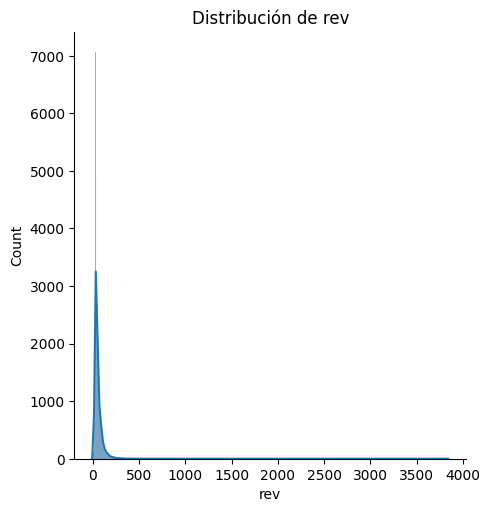

<Figure size 640x480 with 0 Axes>

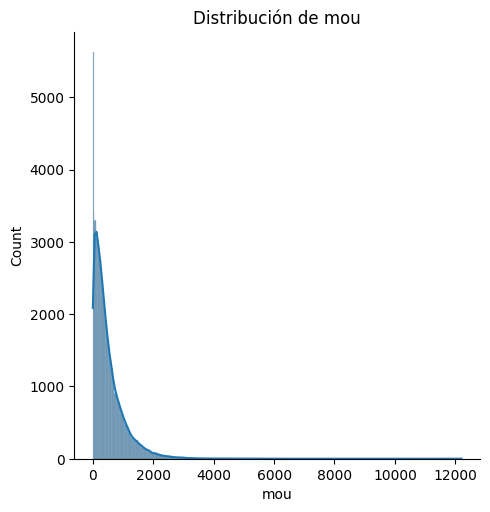

<Figure size 640x480 with 0 Axes>

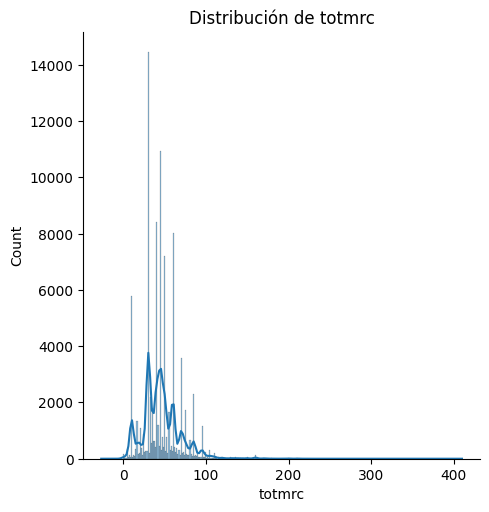

<Figure size 640x480 with 0 Axes>

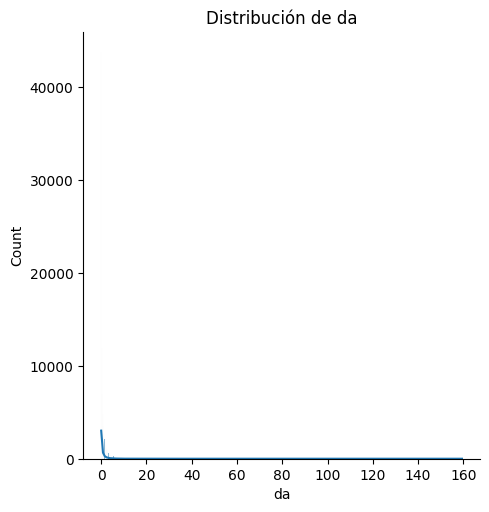

<Figure size 640x480 with 0 Axes>

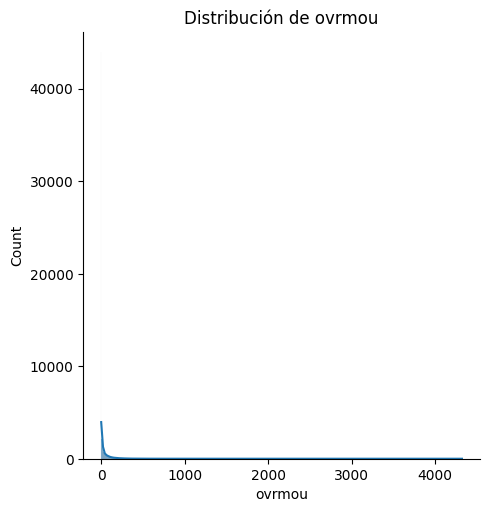

<Figure size 640x480 with 0 Axes>

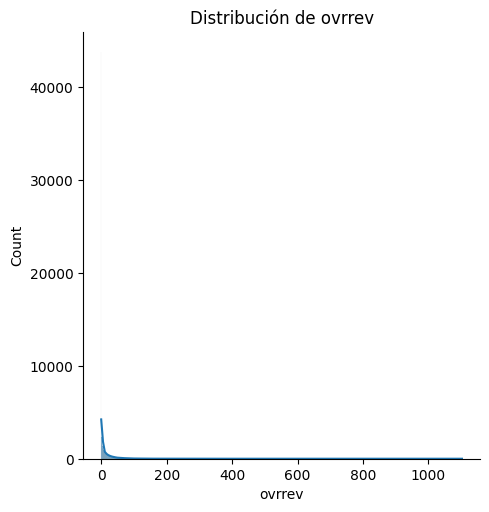

<Figure size 640x480 with 0 Axes>

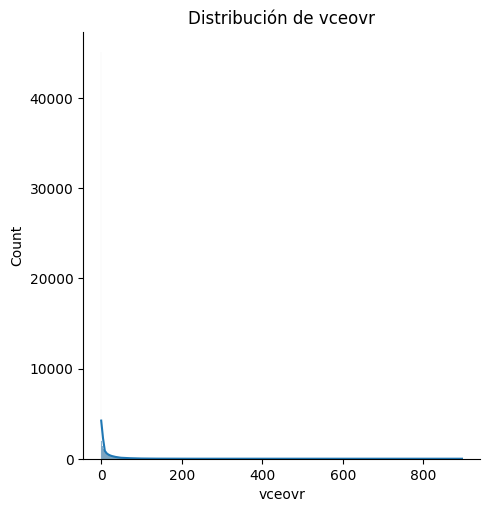

<Figure size 640x480 with 0 Axes>

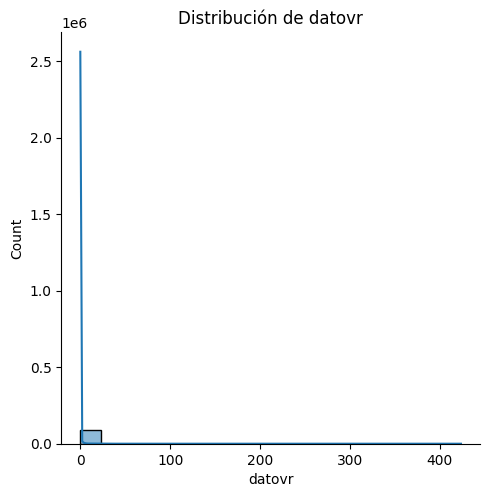

<Figure size 640x480 with 0 Axes>

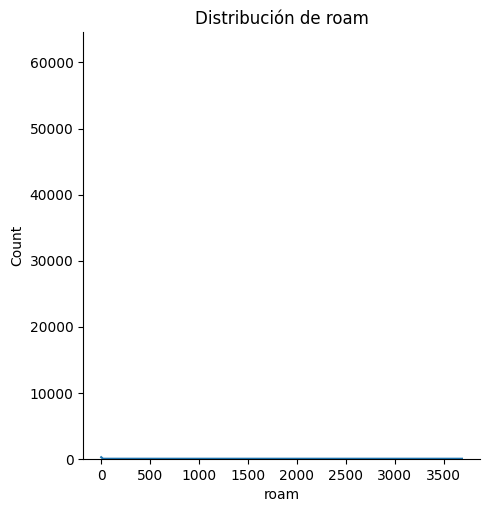

<Figure size 640x480 with 0 Axes>

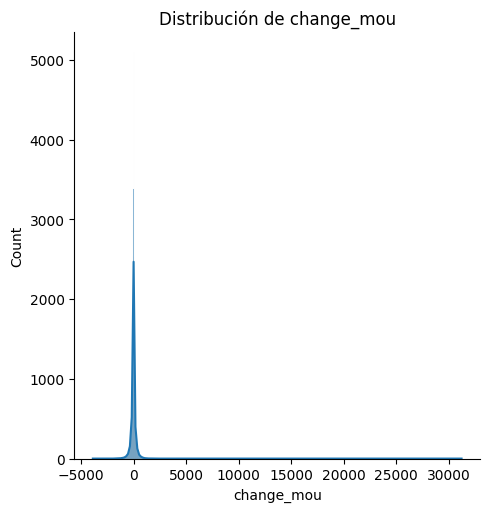

<Figure size 640x480 with 0 Axes>

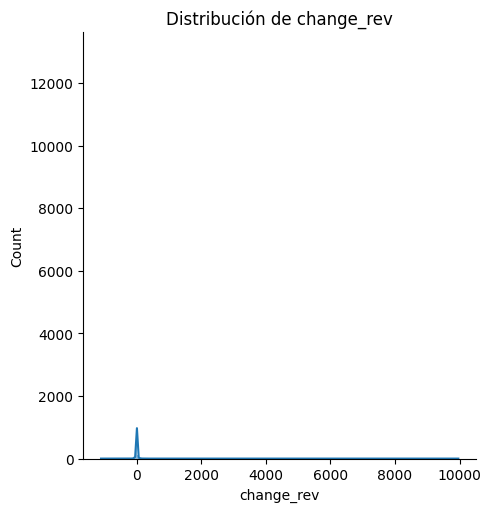

<Figure size 640x480 with 0 Axes>

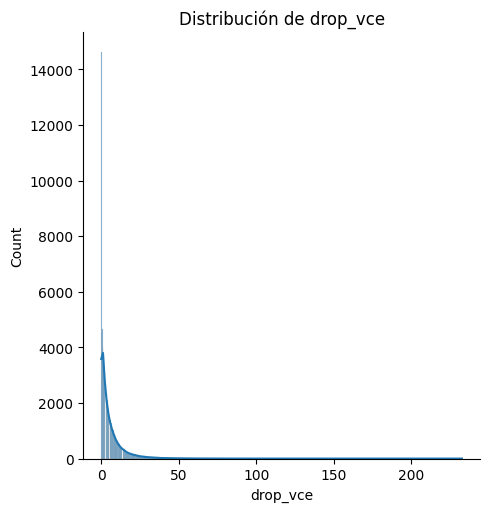

<Figure size 640x480 with 0 Axes>

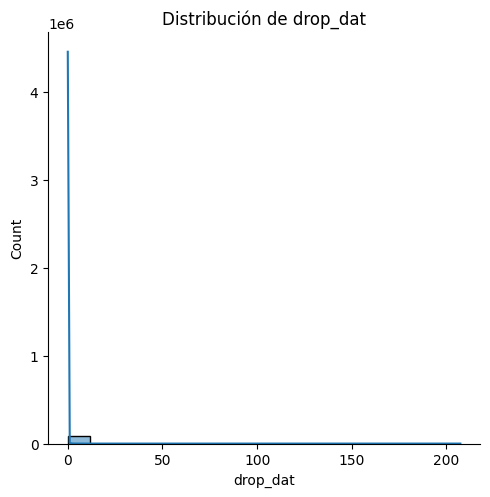

<Figure size 640x480 with 0 Axes>

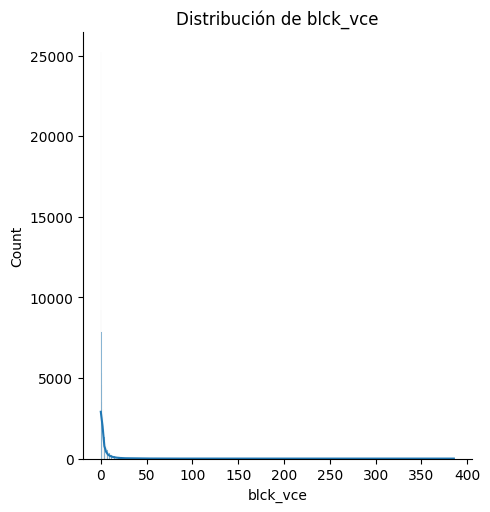

<Figure size 640x480 with 0 Axes>

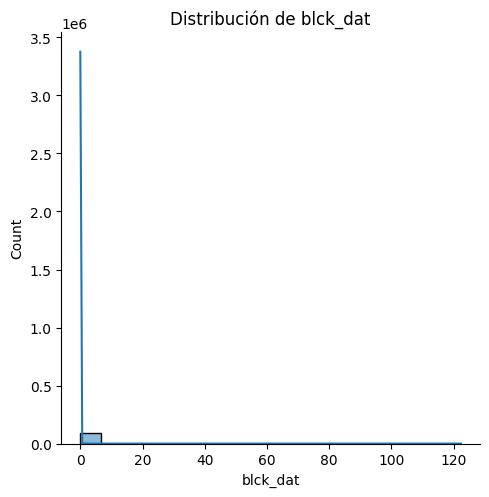

<Figure size 640x480 with 0 Axes>

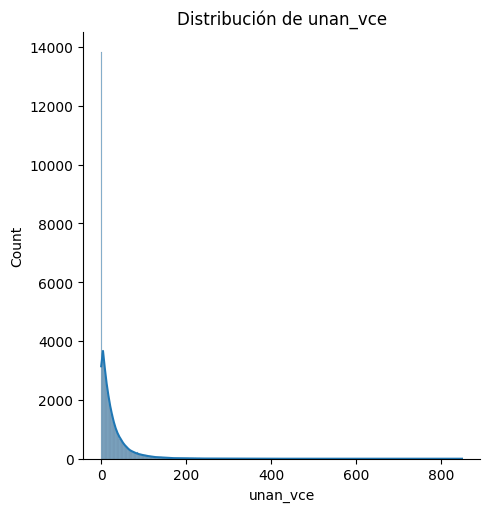

<Figure size 640x480 with 0 Axes>

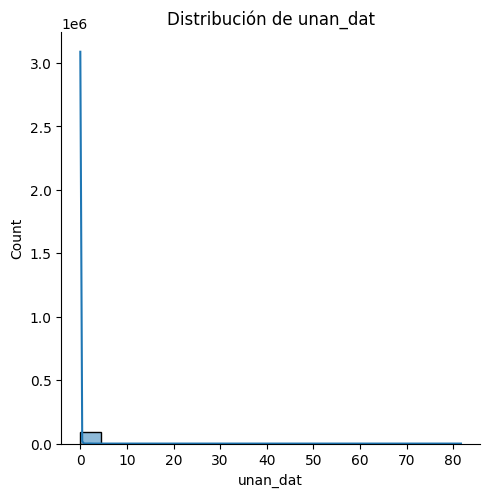

<Figure size 640x480 with 0 Axes>

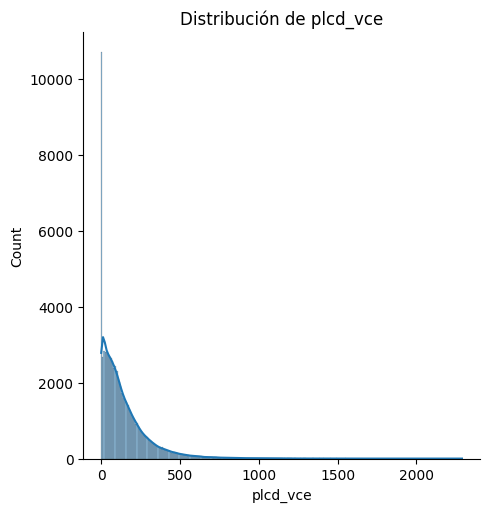

<Figure size 640x480 with 0 Axes>

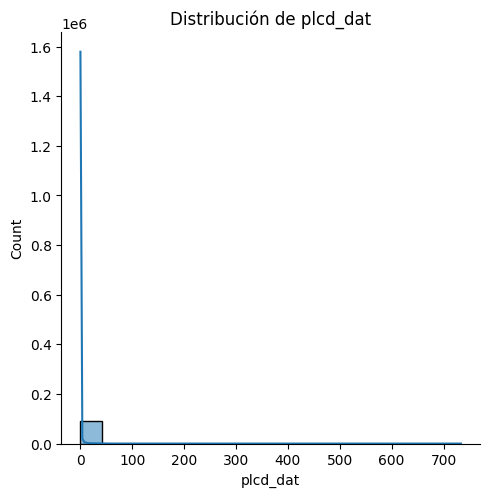

<Figure size 640x480 with 0 Axes>

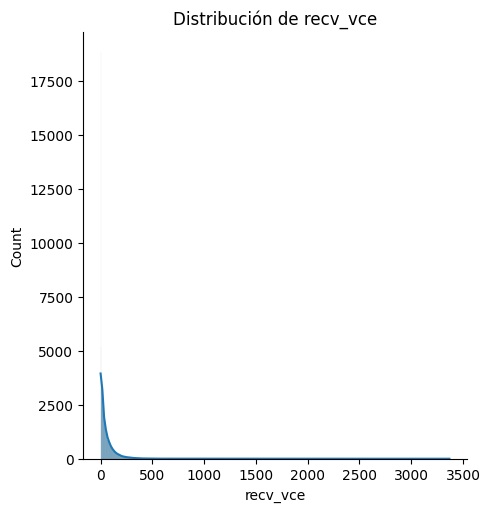

<Figure size 640x480 with 0 Axes>

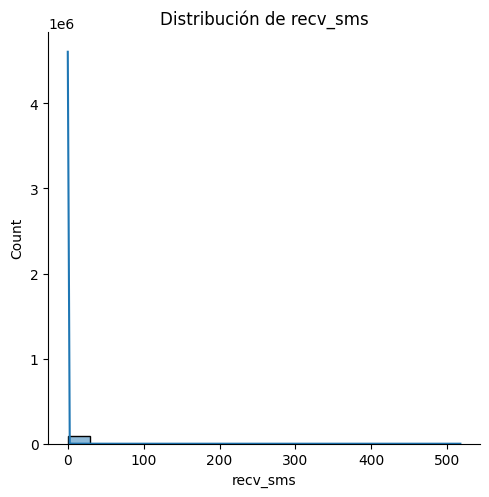

<Figure size 640x480 with 0 Axes>

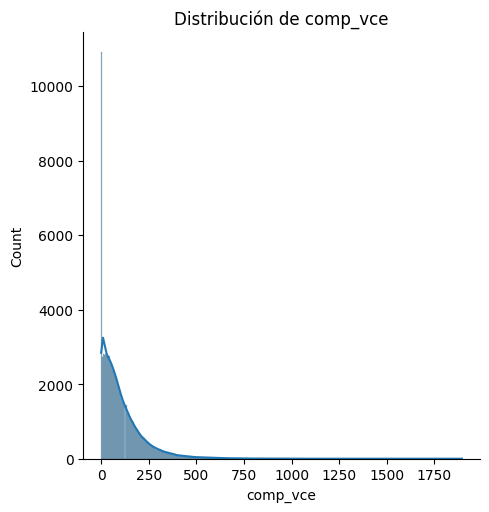

<Figure size 640x480 with 0 Axes>

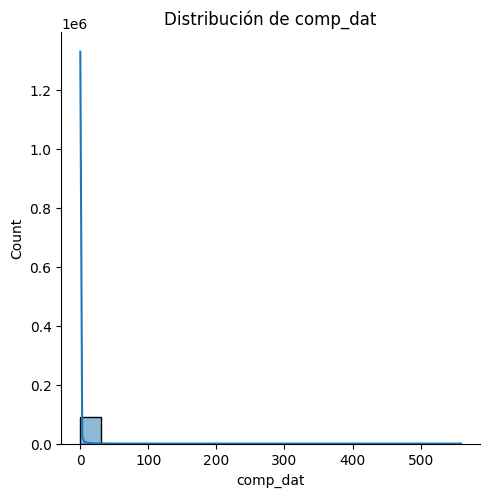

<Figure size 640x480 with 0 Axes>

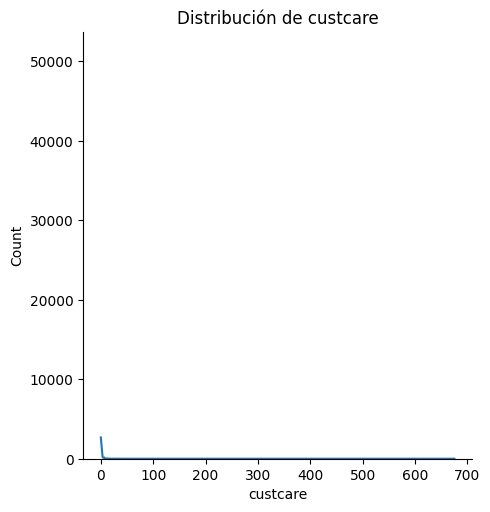

<Figure size 640x480 with 0 Axes>

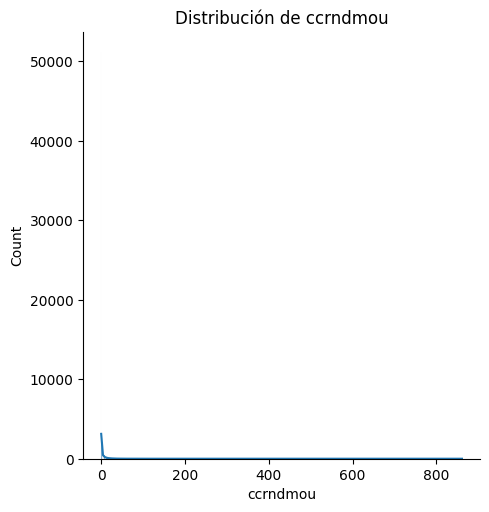

<Figure size 640x480 with 0 Axes>

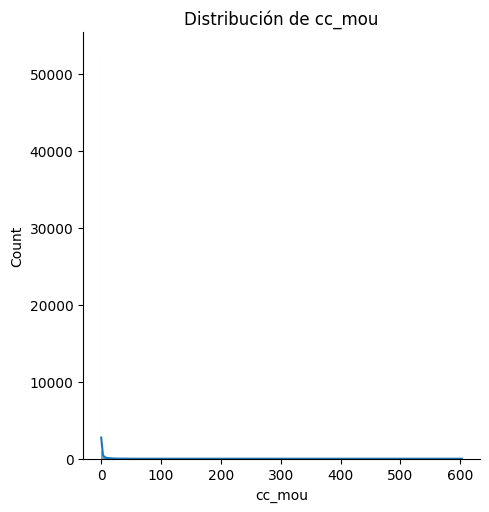

<Figure size 640x480 with 0 Axes>

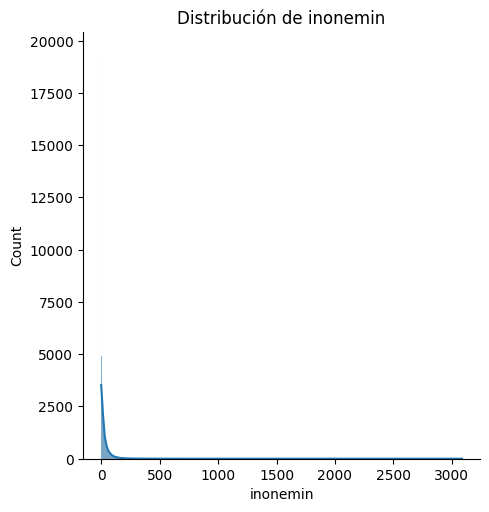

<Figure size 640x480 with 0 Axes>

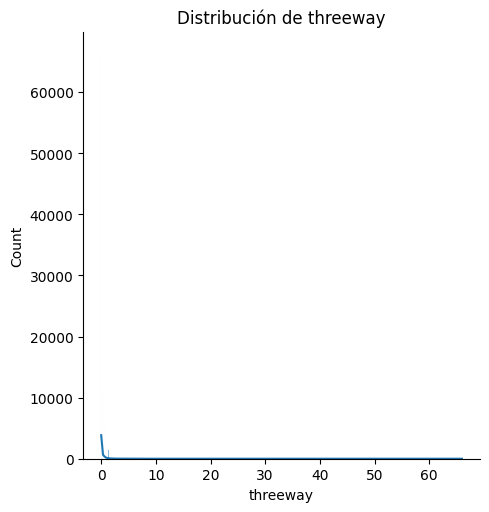

<Figure size 640x480 with 0 Axes>

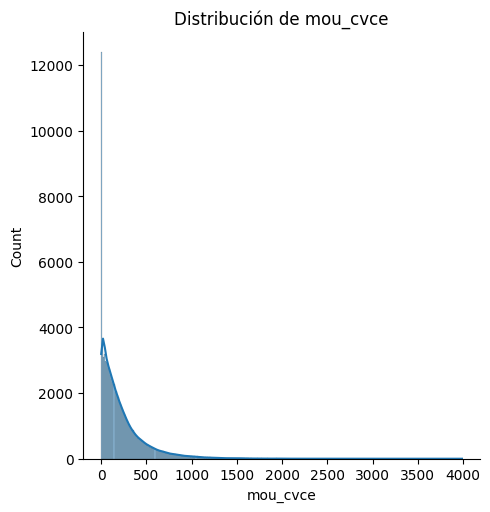

<Figure size 640x480 with 0 Axes>

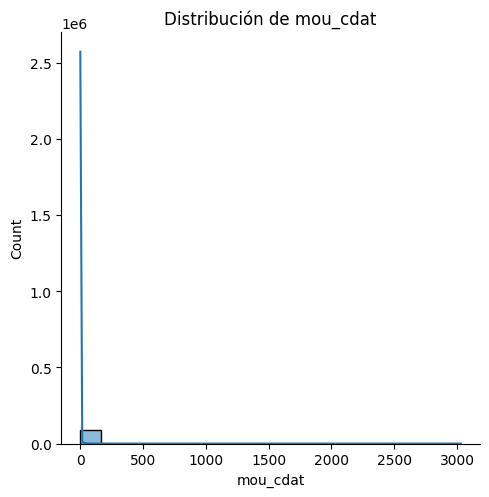

<Figure size 640x480 with 0 Axes>

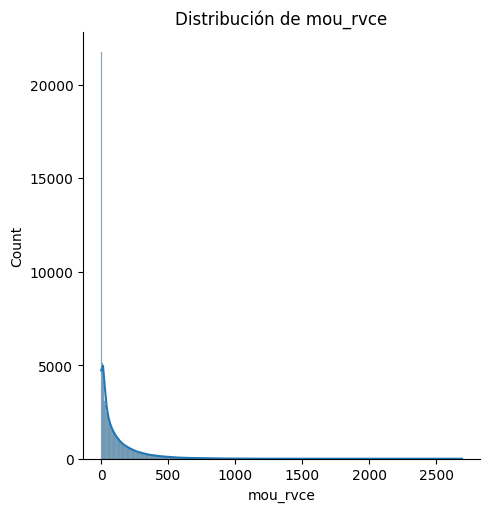

<Figure size 640x480 with 0 Axes>

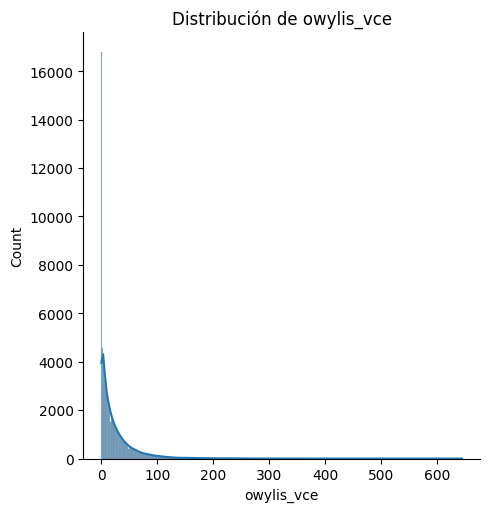

<Figure size 640x480 with 0 Axes>

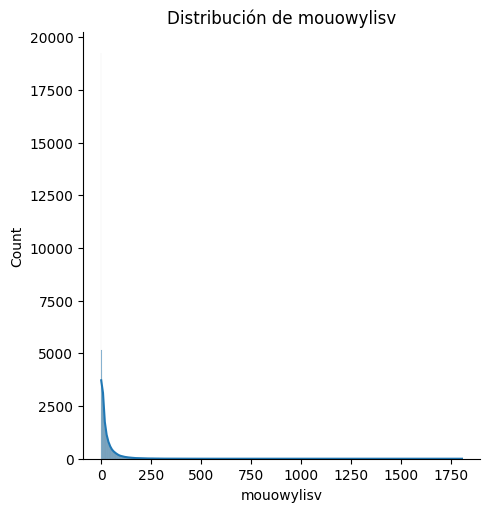

<Figure size 640x480 with 0 Axes>

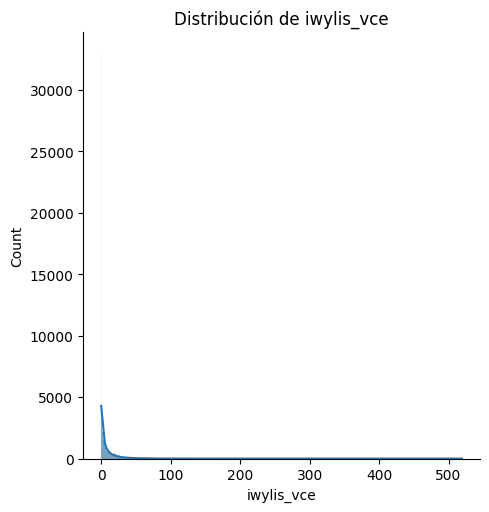

<Figure size 640x480 with 0 Axes>

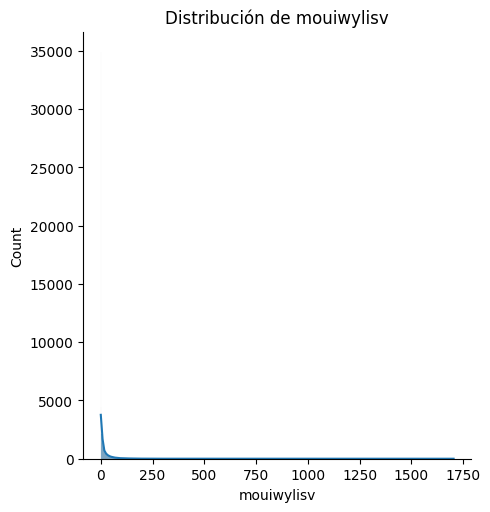

<Figure size 640x480 with 0 Axes>

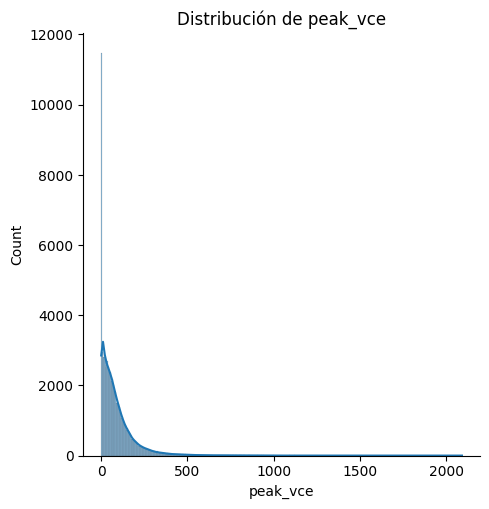

<Figure size 640x480 with 0 Axes>

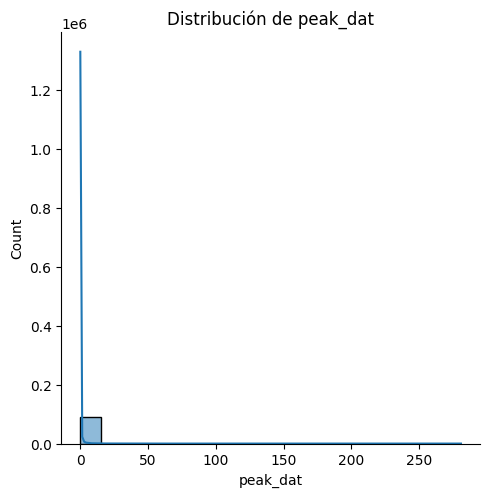

<Figure size 640x480 with 0 Axes>

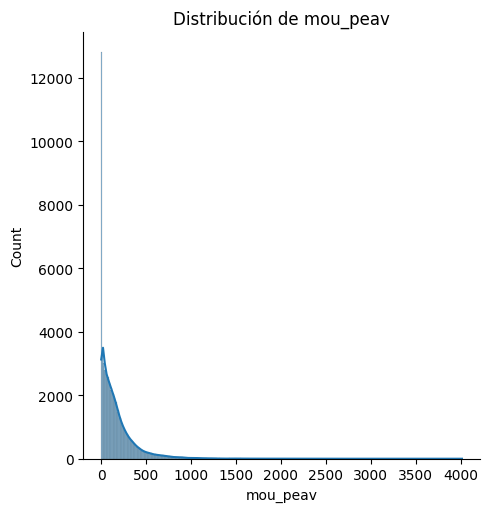

<Figure size 640x480 with 0 Axes>

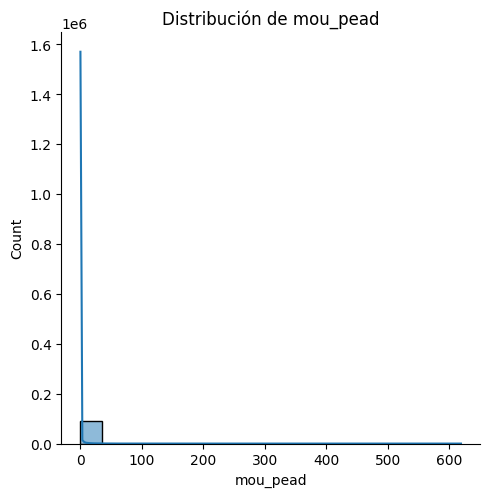

<Figure size 640x480 with 0 Axes>

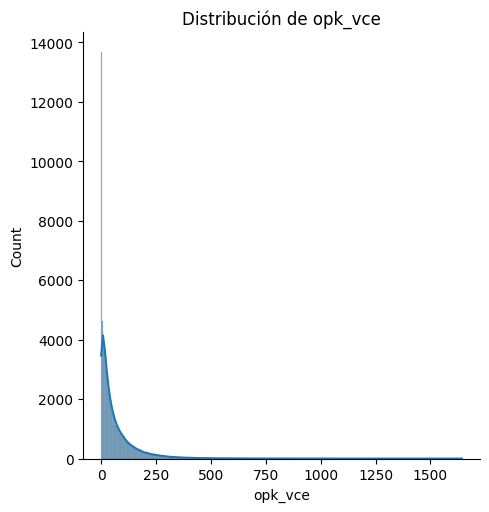

<Figure size 640x480 with 0 Axes>

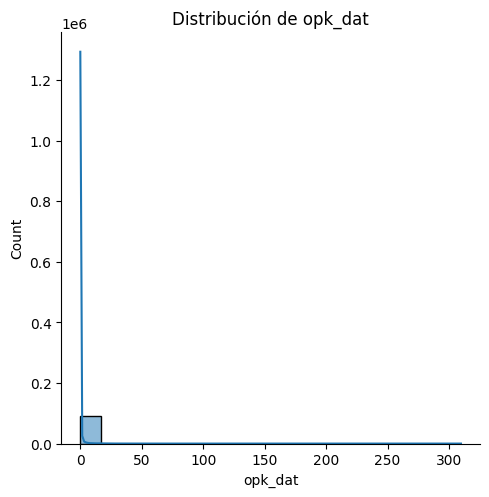

<Figure size 640x480 with 0 Axes>

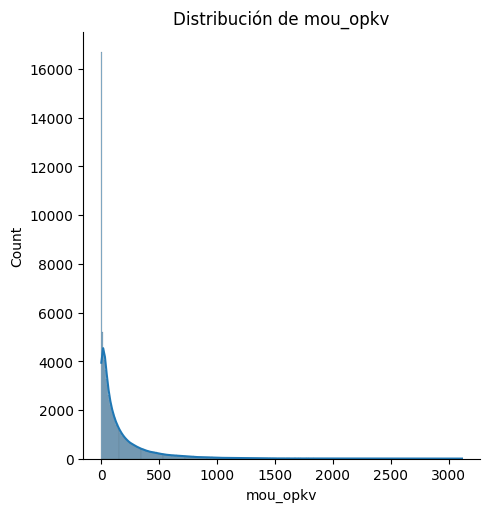

<Figure size 640x480 with 0 Axes>

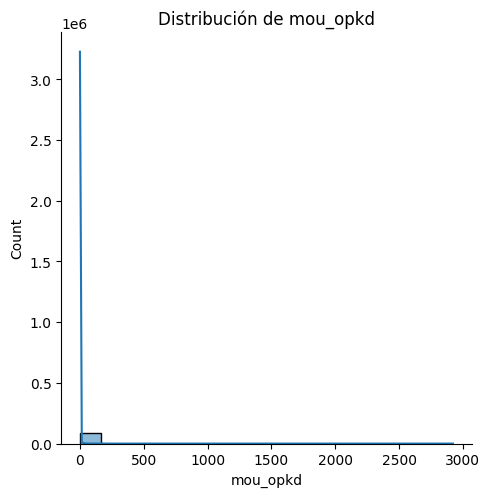

<Figure size 640x480 with 0 Axes>

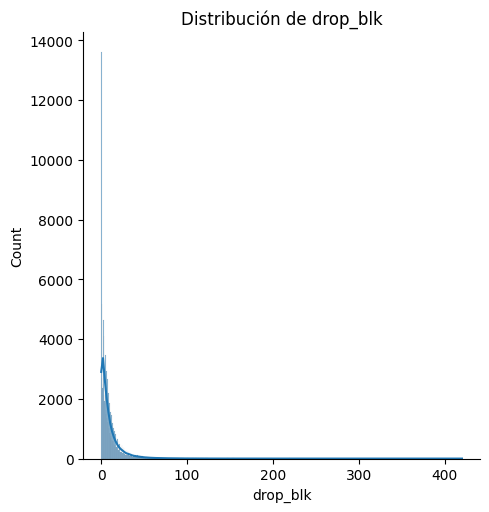

<Figure size 640x480 with 0 Axes>

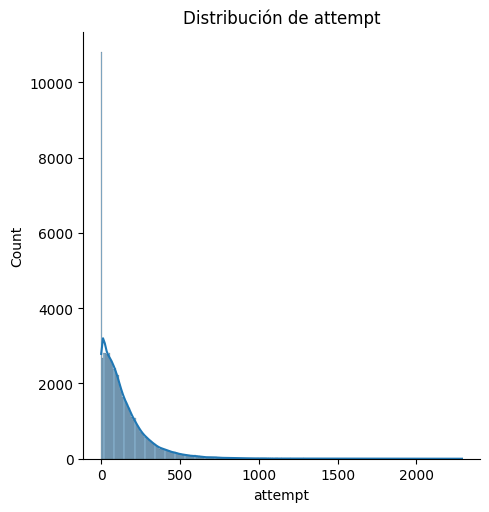

<Figure size 640x480 with 0 Axes>

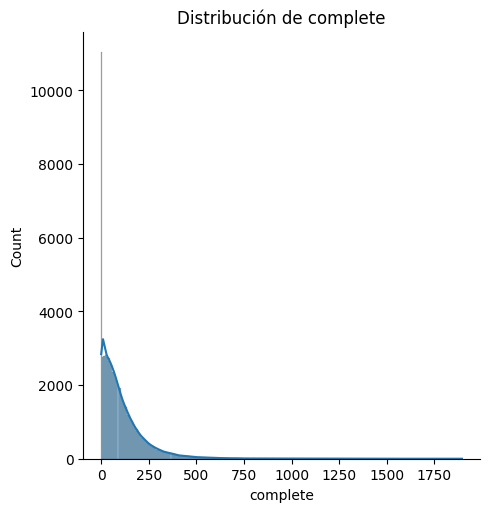

<Figure size 640x480 with 0 Axes>

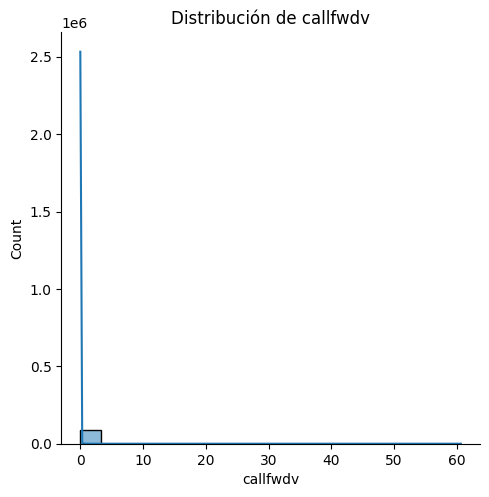

<Figure size 640x480 with 0 Axes>

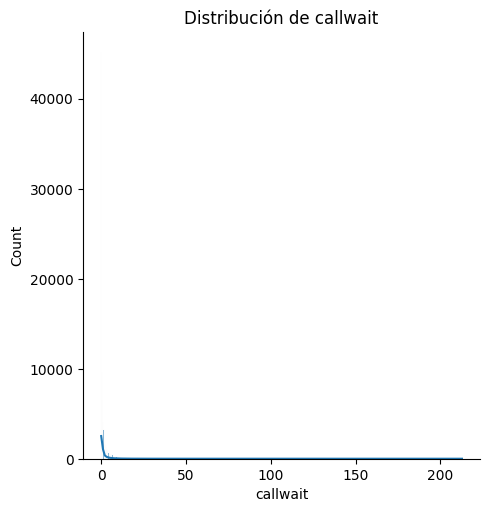

<Figure size 640x480 with 0 Axes>

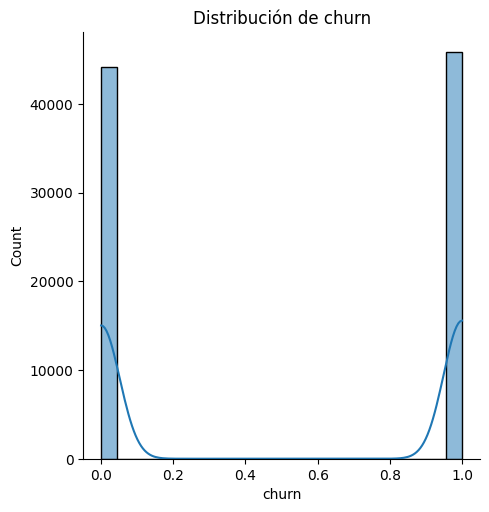

<Figure size 640x480 with 0 Axes>

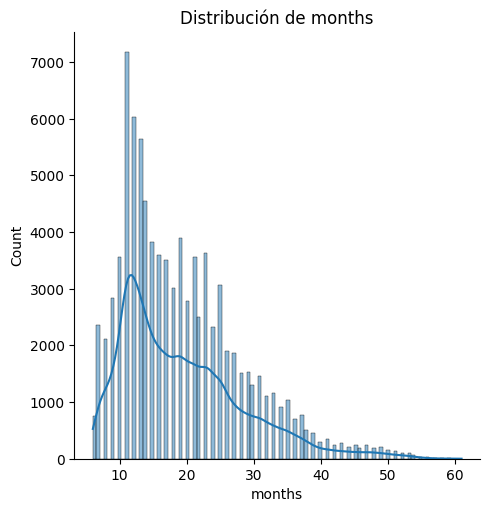

<Figure size 640x480 with 0 Axes>

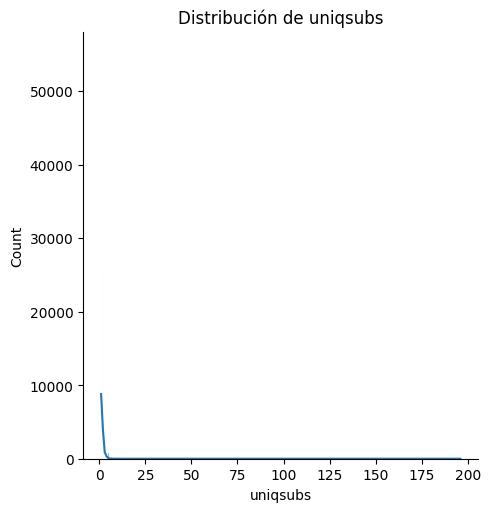

<Figure size 640x480 with 0 Axes>

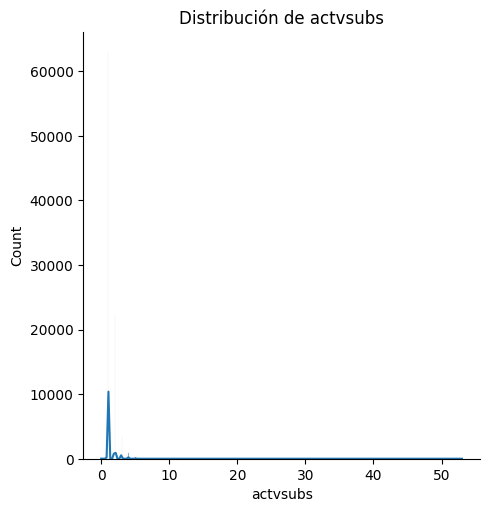

<Figure size 640x480 with 0 Axes>

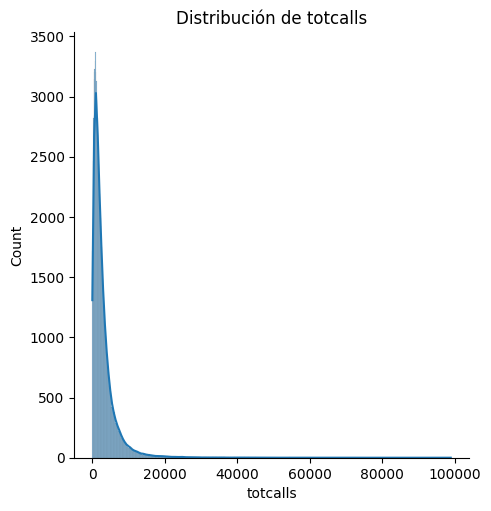

<Figure size 640x480 with 0 Axes>

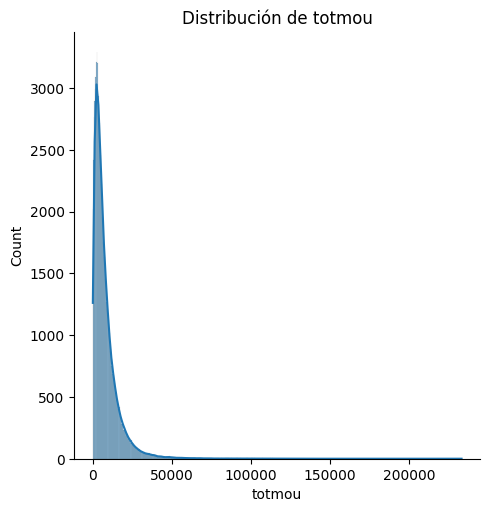

<Figure size 640x480 with 0 Axes>

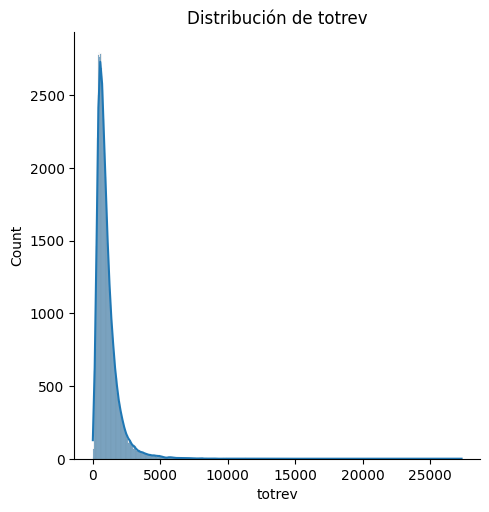

<Figure size 640x480 with 0 Axes>

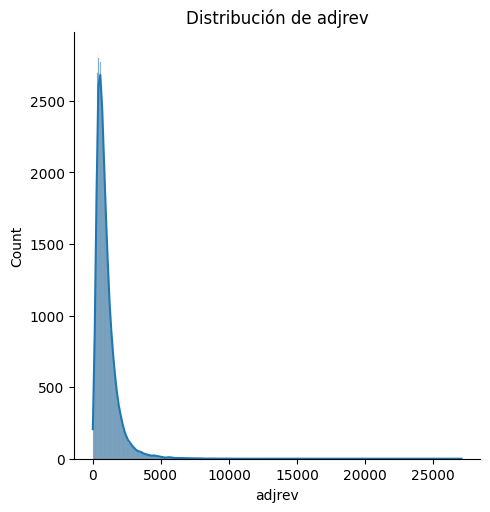

<Figure size 640x480 with 0 Axes>

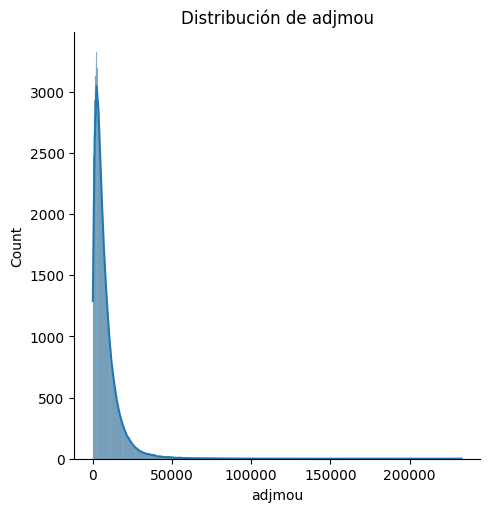

<Figure size 640x480 with 0 Axes>

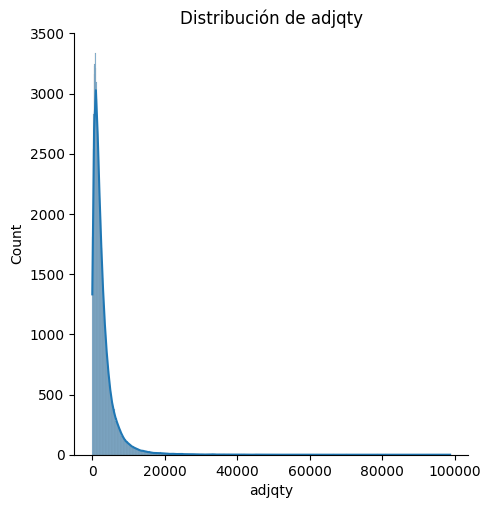

<Figure size 640x480 with 0 Axes>

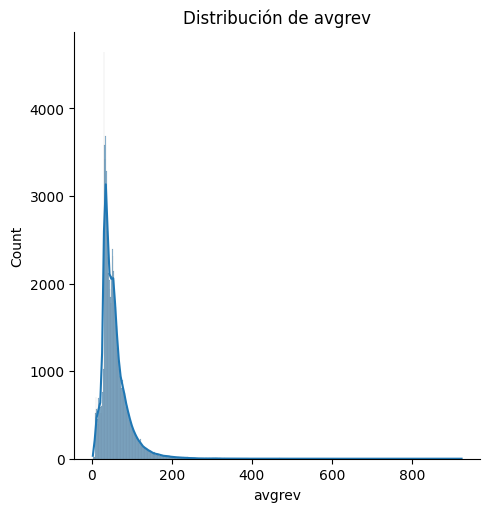

<Figure size 640x480 with 0 Axes>

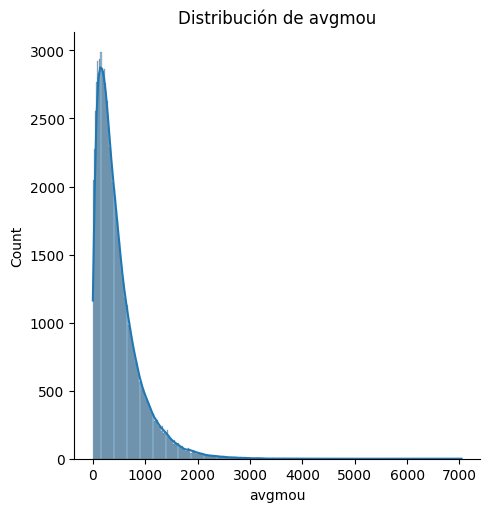

<Figure size 640x480 with 0 Axes>

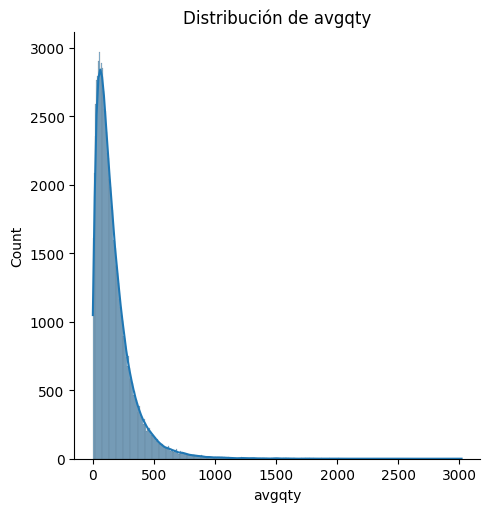

<Figure size 640x480 with 0 Axes>

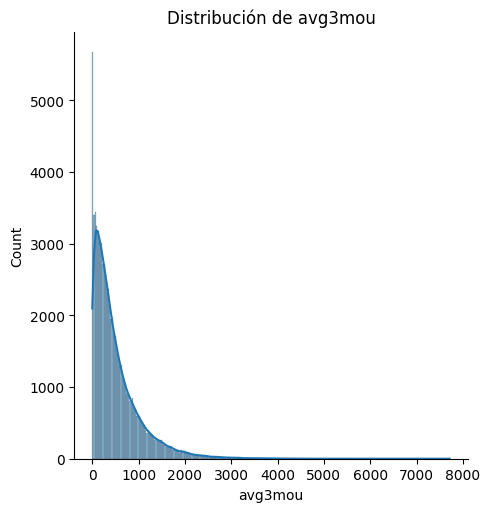

<Figure size 640x480 with 0 Axes>

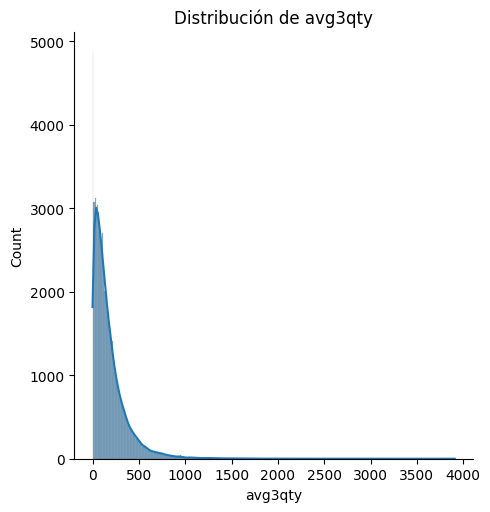

<Figure size 640x480 with 0 Axes>

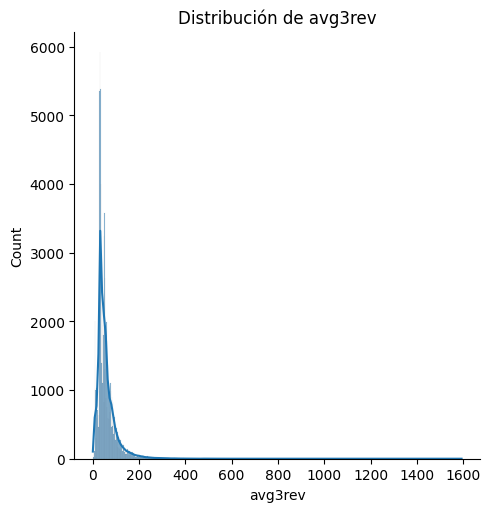

<Figure size 640x480 with 0 Axes>

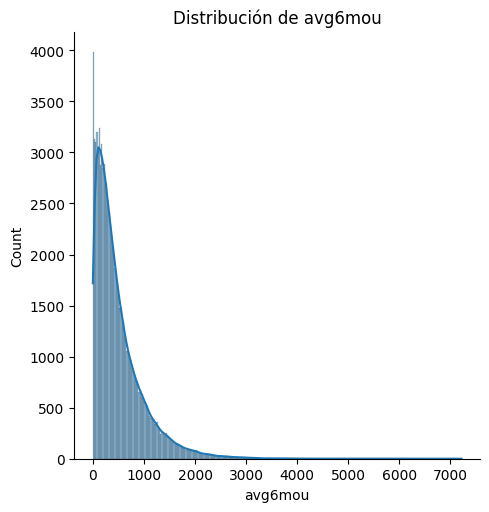

<Figure size 640x480 with 0 Axes>

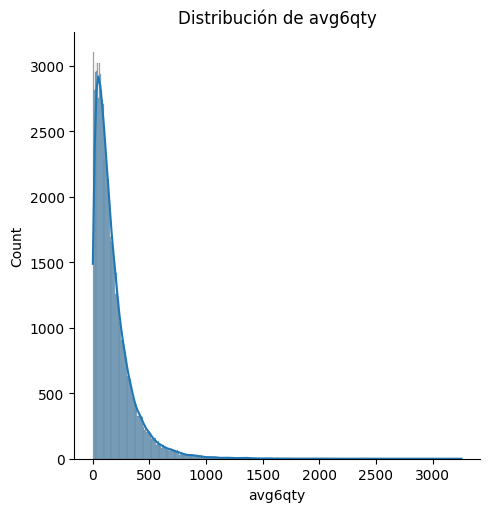

<Figure size 640x480 with 0 Axes>

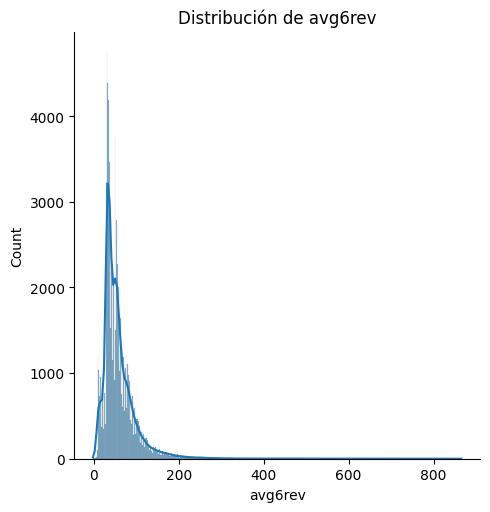

<Figure size 640x480 with 0 Axes>

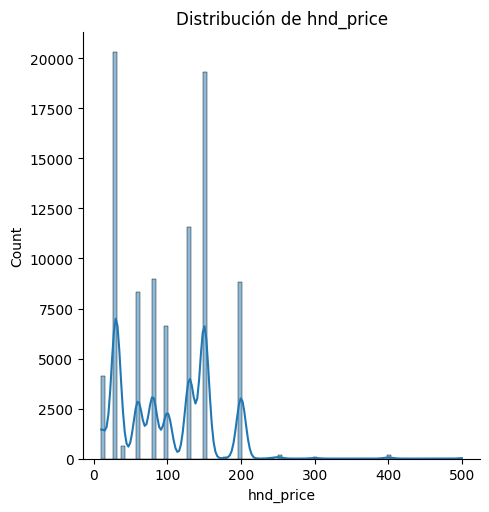

<Figure size 640x480 with 0 Axes>

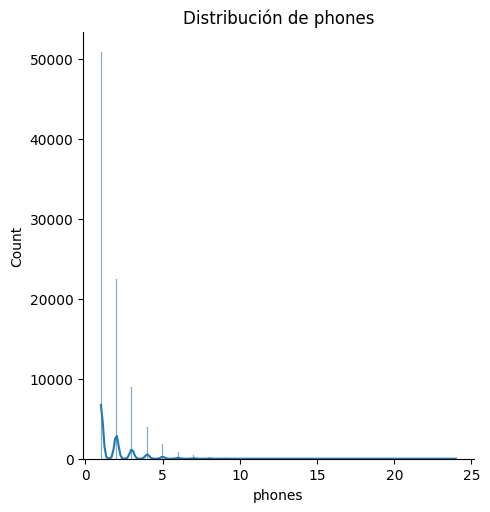

<Figure size 640x480 with 0 Axes>

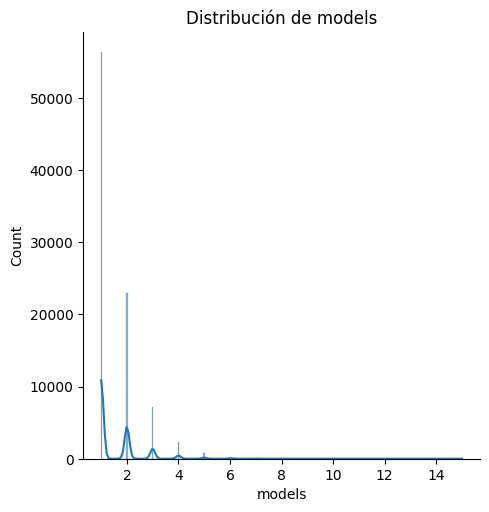

<Figure size 640x480 with 0 Axes>

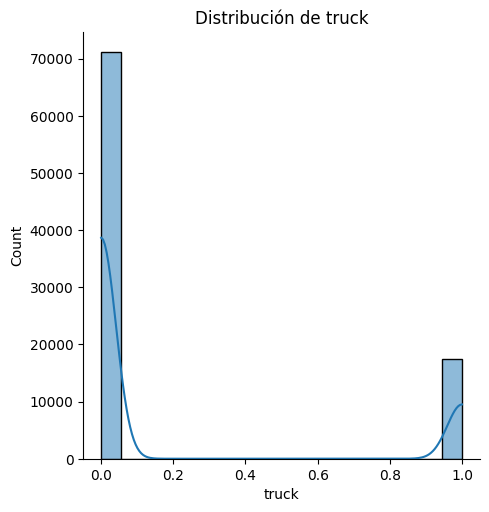

<Figure size 640x480 with 0 Axes>

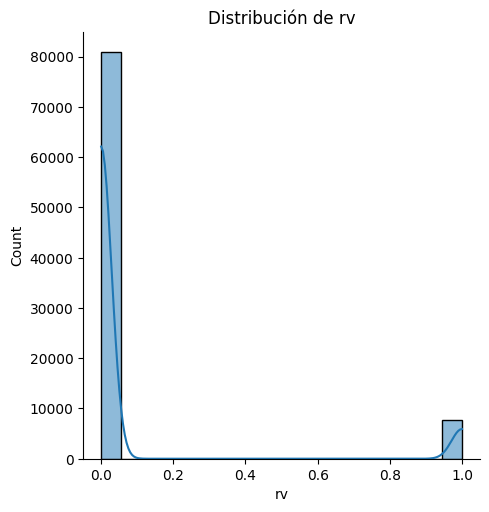

<Figure size 640x480 with 0 Axes>

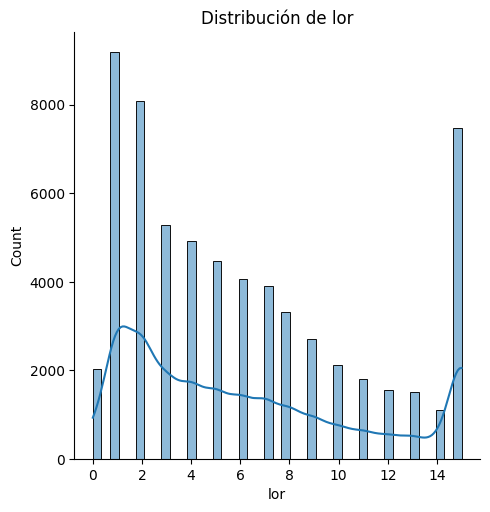

<Figure size 640x480 with 0 Axes>

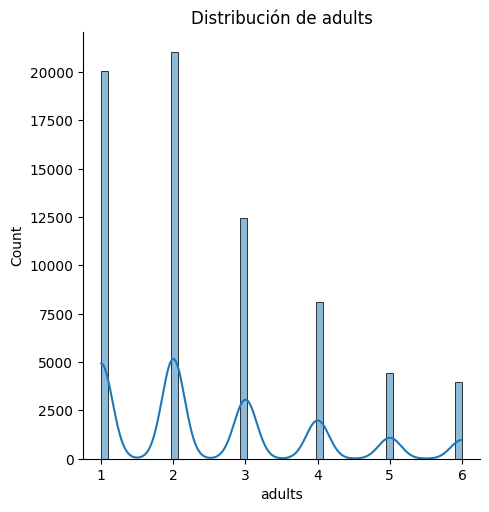

<Figure size 640x480 with 0 Axes>

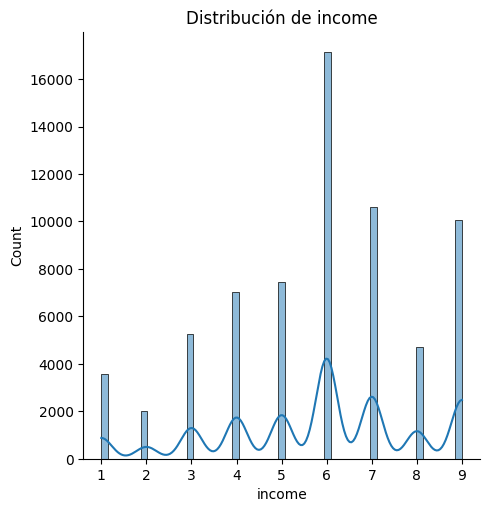

<Figure size 640x480 with 0 Axes>

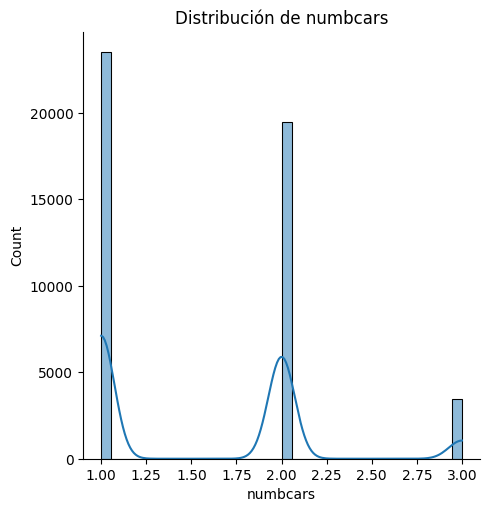

<Figure size 640x480 with 0 Axes>

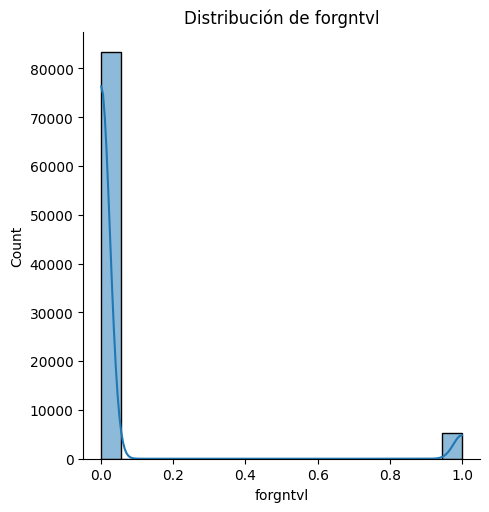

<Figure size 640x480 with 0 Axes>

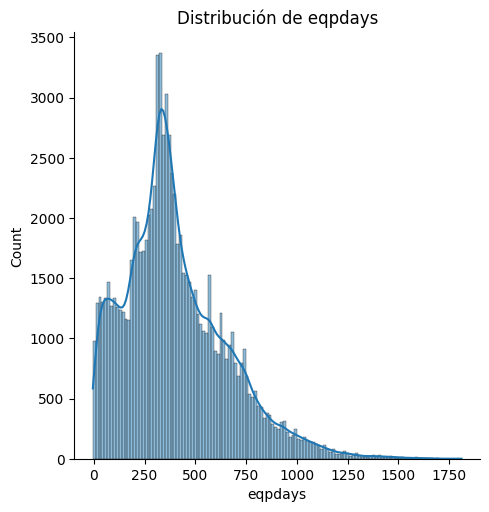

<Figure size 640x480 with 0 Axes>

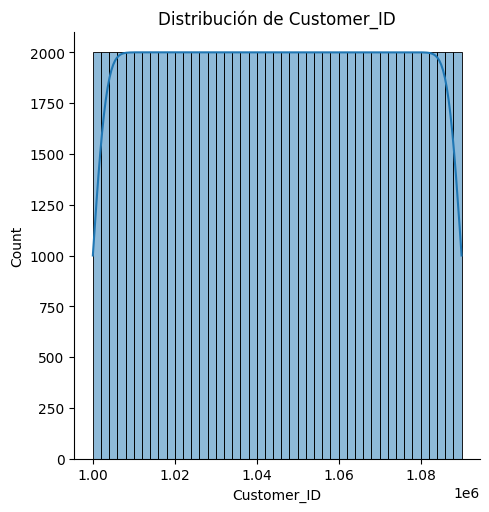

In [ ]:
# Variables numéricas
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure()
    sns.displot(df[col].dropna(), kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

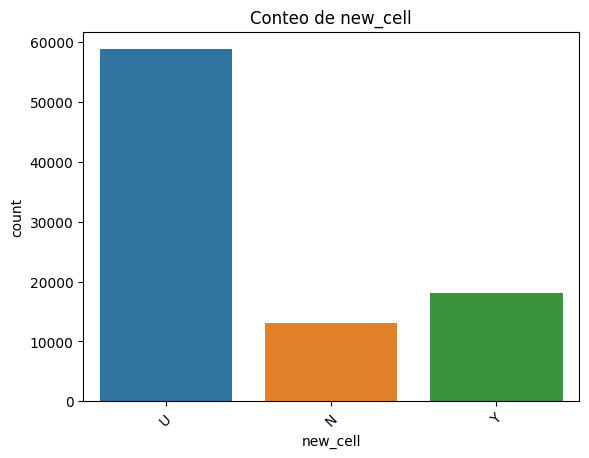

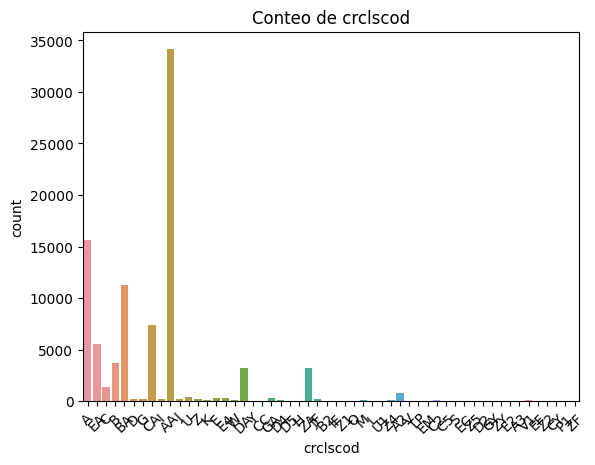

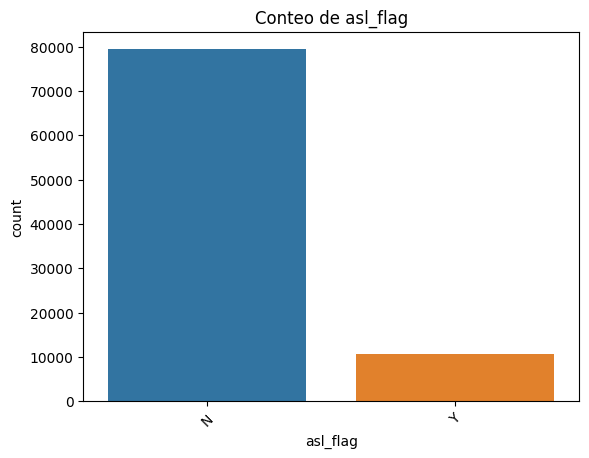

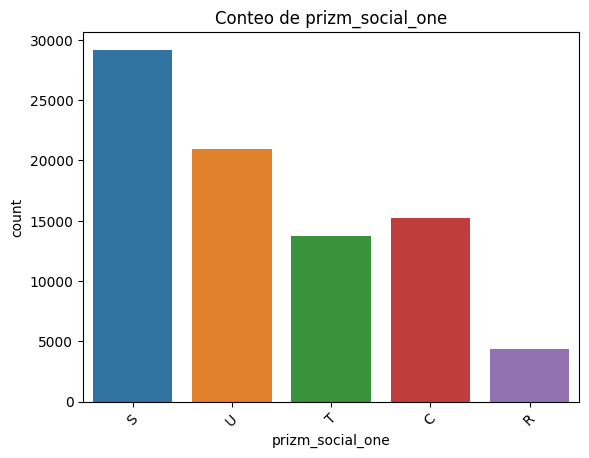

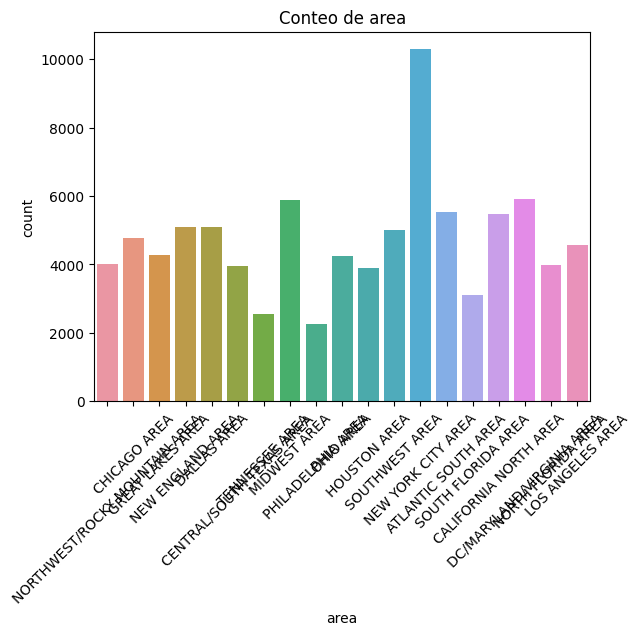

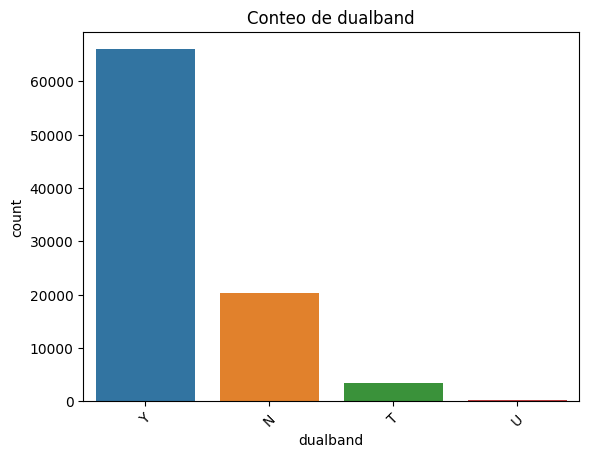

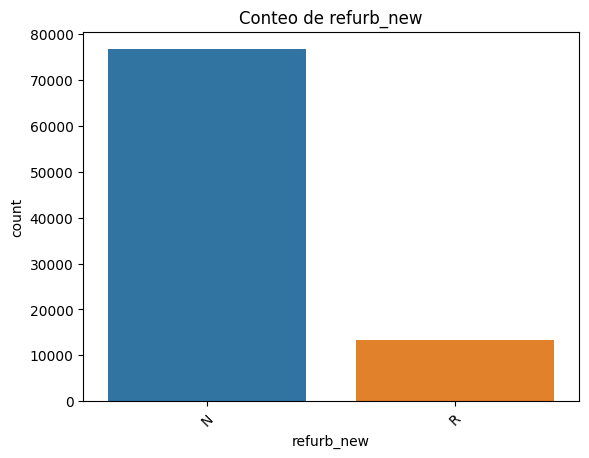

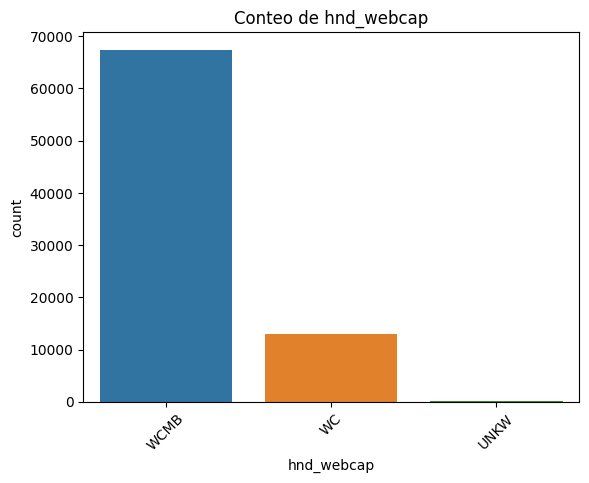

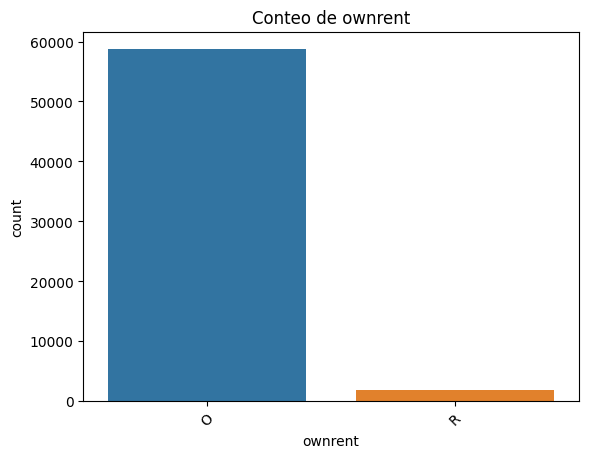

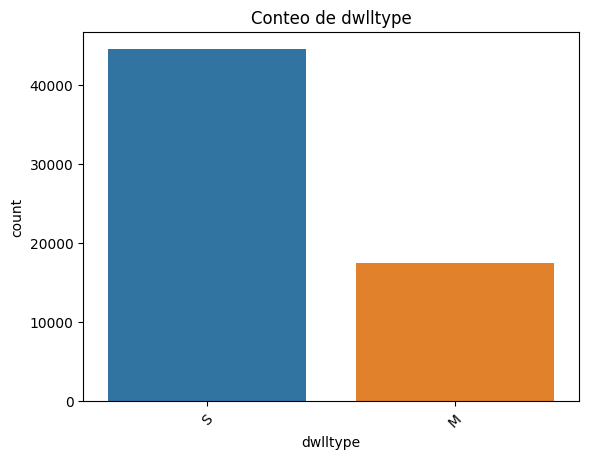

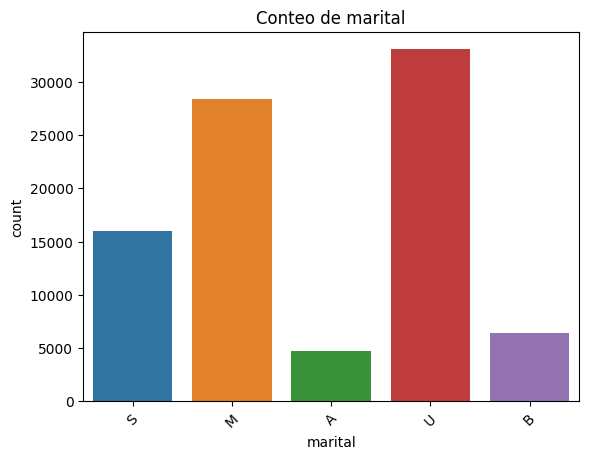

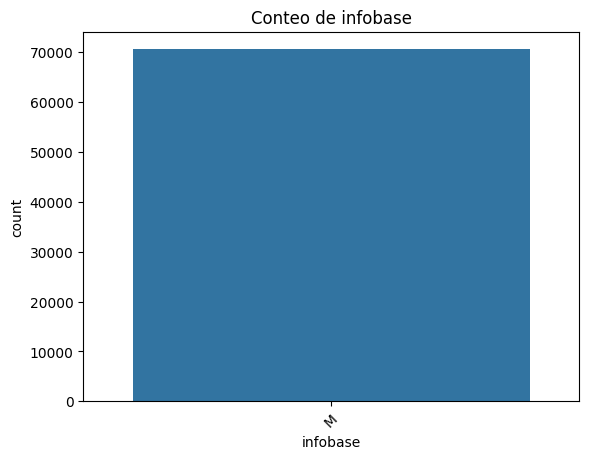

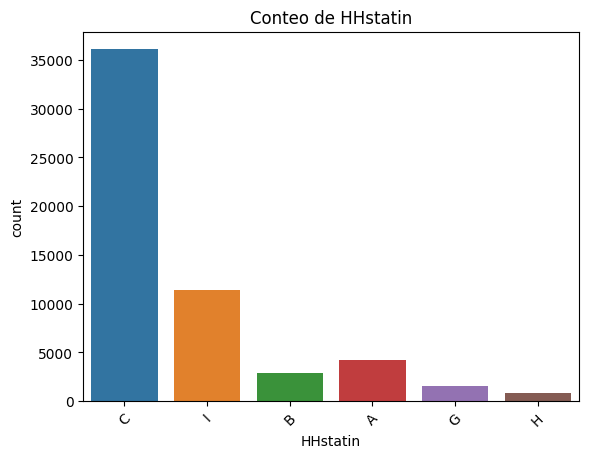

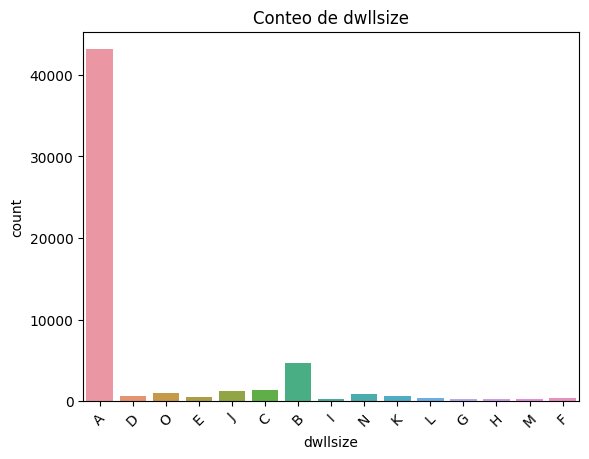

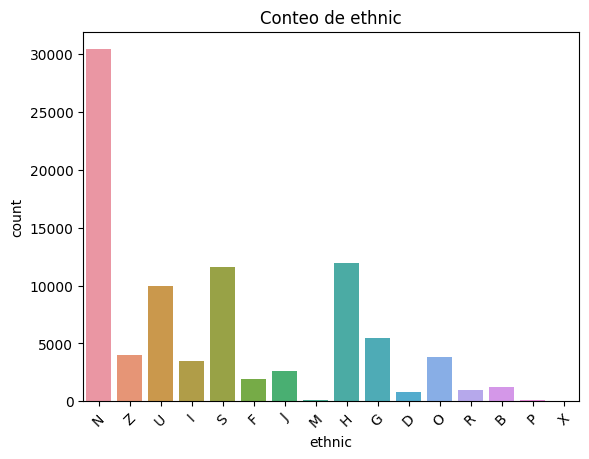

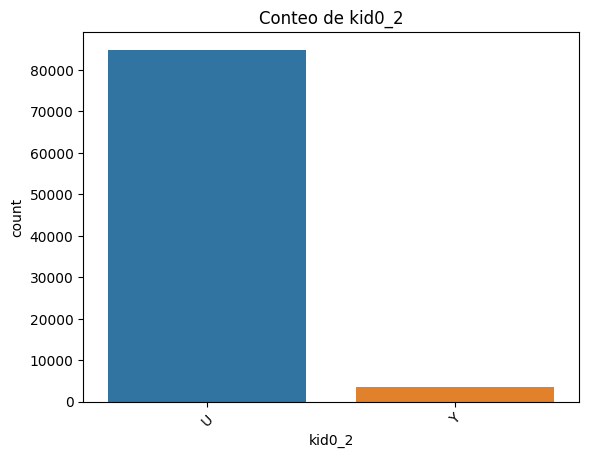

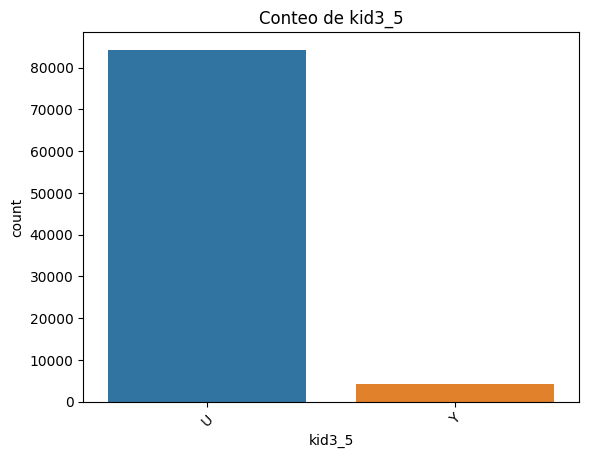

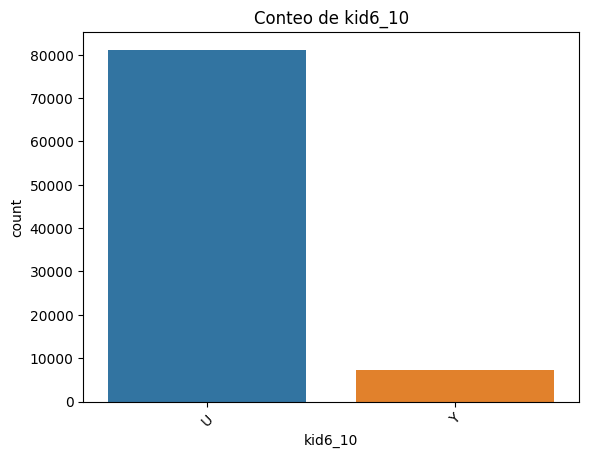

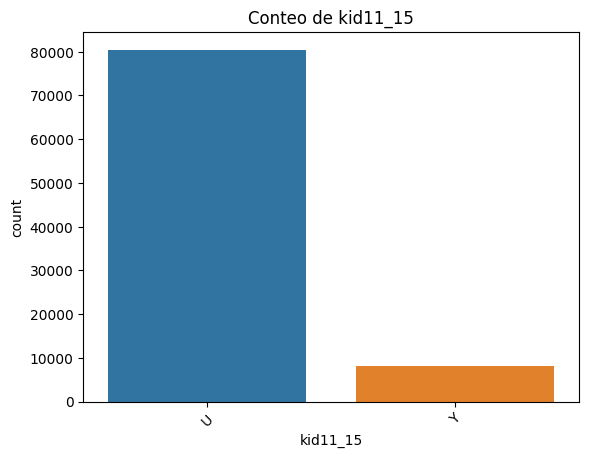

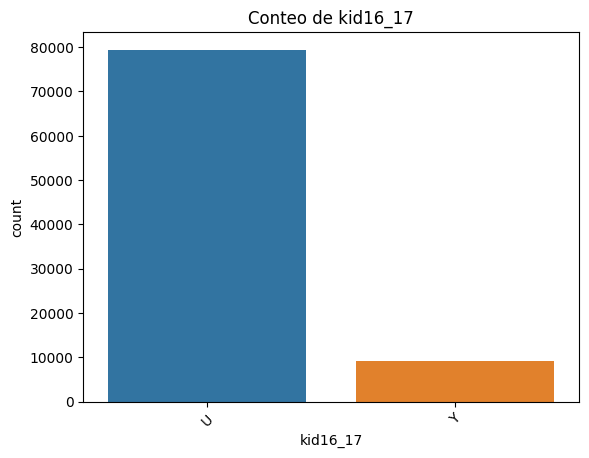

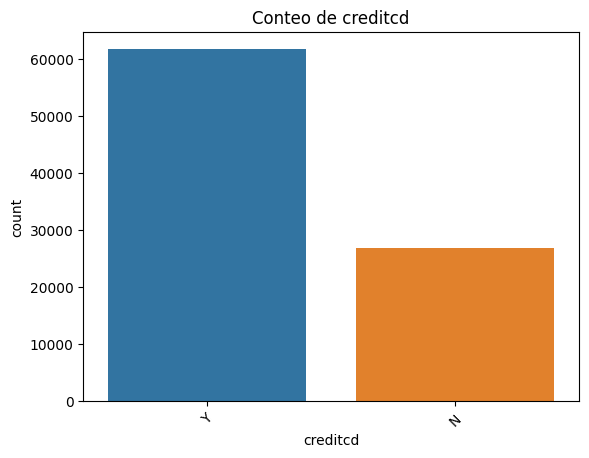

In [ ]:
# Variables categóricas
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f"Conteo de {col}")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
def missing_values_overview(df):
    print("\nTotal missing values:", df.isnull().sum().values.sum())
    print("\nMissing values:")
    print(df.isnull().sum())

In [ ]:
missing_values_overview(df)


Total missing values: 295350

Missing values:
rev             134
mou             134
totmrc          134
da              134
ovrmou          134
               ... 
kid11_15       1451
kid16_17       1451
creditcd       1451
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64


## Distribución del target

In [ ]:
# Distribucion target en %
df['churn'].value_counts() / df.shape[0]  

1    0.508889
0    0.491111
Name: churn, dtype: float64

## Analisis Univariable

Cuando tenemos más de 20 variables, no ayuda. 

* Distribucion de cada variable

In [ ]:
for i in list(df.select_dtypes(include='object').columns):
  print(i)
  print('Unique:',df[i].nunique())
  print(df[i].value_counts(dropna=False),'\n')

new_cell
Unique: 3
U    58812
Y    18114
N    13074
Name: new_cell, dtype: int64 

crclscod
Unique: 54
AA    34152
A     15602
BA    11270
CA     7389
EA     5521
B      3743
DA     3201
ZA     3177
C      1418
A2      771
U       429
E       330
E4      305
GA      265
D       244
G       236
I       231
JF      192
Z       187
J       169
M       153
C2      152
D4      107
Z4       94
K        93
W        84
V1       70
U1       56
EM       46
B2       42
Y        38
EC       32
O        24
CY       21
E2       19
CC       19
D5       16
C5       14
IF       14
ZY       12
Z1       11
Z5        8
H         8
TP        5
D2        5
GY        5
L         4
EF        4
Z2        4
A3        3
P1        2
S         1
V         1
ZF        1
Name: crclscod, dtype: int64 

asl_flag
Unique: 2
N    79401
Y    10599
Name: asl_flag, dtype: int64 

prizm_social_one
Unique: 5
S      29203
U      20935
C      15244
T      13705
NaN     6537
R       4376
Name: prizm_social_one, dtype: int64 

ar

In [ ]:
for column in df.columns:
    unique_values = df[column].nunique()
    if 2 <= unique_values <= 5:
        unique = df[column].unique()
        print(f"Column '{column}' has {unique_values} unique values between 2 and 5.")
        print(unique)

Column 'churn' has 2 unique values between 2 and 5.
[1 0]
Column 'new_cell' has 3 unique values between 2 and 5.
['U' 'N' 'Y']
Column 'asl_flag' has 2 unique values between 2 and 5.
['N' 'Y']
Column 'prizm_social_one' has 5 unique values between 2 and 5.
['S' 'U' 'T' 'C' nan 'R']
Column 'dualband' has 4 unique values between 2 and 5.
['Y' 'N' 'T' 'U' nan]
Column 'refurb_new' has 2 unique values between 2 and 5.
['N' 'R' nan]
Column 'hnd_webcap' has 3 unique values between 2 and 5.
['WCMB' 'WC' nan 'UNKW']
Column 'truck' has 2 unique values between 2 and 5.
[ 0.  1. nan]
Column 'rv' has 2 unique values between 2 and 5.
[ 0.  1. nan]
Column 'ownrent' has 2 unique values between 2 and 5.
['O' nan 'R']
Column 'dwlltype' has 2 unique values between 2 and 5.
['S' 'M' nan]
Column 'marital' has 5 unique values between 2 and 5.
['S' 'M' 'A' 'U' 'B' nan]
Column 'numbcars' has 3 unique values between 2 and 5.
[ 3.  1.  2. nan]
Column 'forgntvl' has 2 unique values between 2 and 5.
[ 0.  1. nan]
C

## Analisis Variable-Target

* Relacion target-variable

# Data Cleaning

*   Eliminar filas sin target informado.
*   Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)



In [ ]:
# Check si hay filas sin target
df['churn'].isna().any()

False

In [ ]:
# Check duplicados
df.index.nunique() != len(df.index)


False

In [ ]:
# Definimos el 'Customer ID' como el indice de nuestro dataset
df = df.set_index('Customer_ID')

## Corregir data types incorrectos

*  **Boolean (14):** churn, asl_flag, refurb_new, truck, rv, ownrent, dwlltype, forgntvl, kid0_2, kid3_5, kid6_10, kid11_15, kid16_17, creditcd


In [ ]:
target = ['churn']

In [ ]:
# Vamos a encodear el resto de variables booleanas a través de .map()
encoder_map = {
    'asl_flag': {'Y': 1, 'N': 0},
    'refurb_new': {'R': 1, 'N': 0},
    'ownrent': {'O': 1, 'R': 0},
    'dwlltype': {'M': 1, 'S': 0},
    'kid0_2': {'Y': 1, 'U': 0},
    'kid3_5': {'Y': 1, 'U': 0},
    'kid6_10': {'Y': 1, 'U': 0},
    'kid11_15': {'Y': 1, 'U': 0},
    'kid16_17': {'Y': 1, 'U': 0},
    'creditcd': {'Y': 1, 'N': 0}}

In [ ]:
for col in encoder_map.keys():
  df[col] = df[col].map(encoder_map[col])

* **area_group:** agrupa las areas en categorías más amplias según su localización. Para ello, vamos a generar un diccionario donde se assigna cada zona a un grupo de areas.

In [ ]:
area_mapping = {
    'NEW YORK CITY AREA': 'Northeast',
    'DC/MARYLAND/VIRGINIA AREA': 'Mid-Atlantic',
    'MIDWEST AREA': 'Midwest',
    'ATLANTIC SOUTH AREA': 'South',
    'CALIFORNIA NORTH AREA': 'West',
    'DALLAS AREA': 'South',
    'NEW ENGLAND AREA': 'Northeast',
    'SOUTHWEST AREA': 'South',
    'CHICAGO AREA': 'Midwest',
    'LOS ANGELES AREA': 'West',
    'GREAT LAKES AREA': 'Midwest',
    'OHIO AREA': 'Midwest',
    'NORTHWEST/ROCKY MOUNTAIN AREA': 'West',
    'NORTH FLORIDA AREA': 'South',
    'CENTRAL/SOUTH TEXAS AREA': 'South',
    'HOUSTON AREA': 'South',
    'SOUTH FLORIDA AREA': 'South',
    'TENNESSEE AREA': 'South',
    'PHILADELPHIA AREA': 'Mid-Atlantic',
    'Unknown': 'Unknown'
}

df['area_group'] = df['area'].map(area_mapping)

In [ ]:
df.drop(['area'], axis=1, inplace=True)


In [ ]:
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,area_group
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,0,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,Y,0.0,149.98999,2.0,2.0,WCMB,0.0,0.0,1.0,15.0,0.0,S,1.0,M,4.0,3.0,C,A,0.0,N,0.0,0.0,0.0,0.0,0.0,1.0,361.0,West
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,0,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,N,0.0,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,0.0,S,1.0,M,5.0,1.0,C,A,0.0,Z,0.0,0.0,0.0,0.0,0.0,1.0,240.0,Midwest
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,0,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,N,0.0,29.98999,2.0,1.0,NaN,0.0,0.0,1.0,7.0,0.0,M,2.0,M,5.0,2.0,C,A,0.0,N,0.0,1.0,0.0,0.0,0.0,1.0,1504.0,Midwest
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,0,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,N,0.0,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,1.0,M,4.0,M,6.0,1.0,C,D,0.0,U,1.0,0.0,0.0,0.0,0.0,1.0,1812.0,Midwest
1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,0,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,Y,0.0,149.98999,6.0,4.0,WCMB,0.0,0.0,0.0,5.0,1.0,S,1.0,M,6.0,1.0,C,O,0.0,I,0.0,0.0,0.0,0.0,0.0,1.0,434.0,Northeast


## (EXTRA) Feature Engineering

Hemos probado de generar varias variables, pero al final el modelo original daba un mejor AUC score. Las incluímos en el notebook, pero no se han ejecutado:

1. **usage-to-charge_ratio**: ratio entre uso medio de minutos mensuales (mou) y la media del revenue mensual (rev). Esta variable nos puede proporcionar información sobre la eficiencia de la generación de ingresos en función del uso.

In [ ]:
## Generamos una función para identificar y reemplazar valores infinitos (por outlayer values), generados por al división entre 0:
#def infinite_numbers(df, column):
    ## Count of infinite values
    #infinite_count = np.isinf(df[column]).sum()
    #print('Number of infinite values:', infinite_count)
    #if infinite_count != 0:
        ## Replace infinite values with -999999999
        #df[column] = df[column].replace([np.inf, -np.inf], -999999999)
        #print(df[column].value_counts())

In [ ]:
#df['usage_to_charge_ratio'] = df['mou'] / df['rev']
#infinite_numbers(df, 'usage_to_charge_ratio')

Number of infinite values: 6
0.000000     1491
0.650000       11
0.050000       11
0.016672       10
1.867289        9
             ... 
6.508692        1
8.324509        1
48.162839       1
9.577080        1
11.566901       1
Name: usage_to_charge_ratio, Length: 85290, dtype: int64


2. **overage_rev_per:** porcentaje de ingresos generados por minutos excedentes (ovrrev) del total de ingresos (totrev). Esta función puede indicar la contribución de los cargos por excedentes a los ingresos generales.

In [ ]:
#df['overage_rev_per'] = (df['ovrrev'] / df['totrev']) * 100
#infinite_numbers(df, 'overage_rev_per')

Number of infinite values: 0


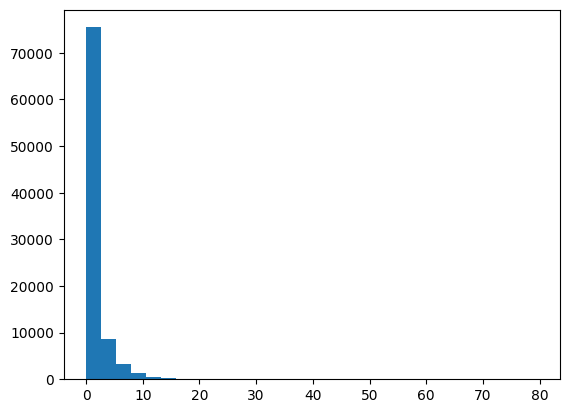

In [ ]:
## Plot histogram
#plt.hist(df['overage_rev_per'], bins=30)
#plt.show()

3. **avg_rev_month**: ingreso mensual promedio (avgrev), que se obtiene dividiendo el ingreso total (totrev) por el número total de meses en servicio (meses). Esta característica proporciona una medida de ingresos promedio que considera la duración de la suscripción del cliente.

In [ ]:
#df['avg_rev_month'] = df['totrev'] / df['months']
#infinite_numbers(df, 'avg_rev_month')

Number of infinite values: 0


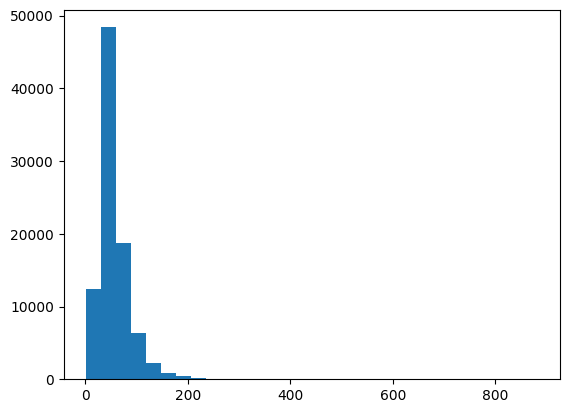

In [ ]:
## Plot histogram
#plt.hist(df['avg_rev_month'], bins=30)
#plt.show()

4. **total_calls:** total de llamadas realizadas sumando el número total de llamadas completadas (complete), el número total de llamadas fallidas (drop_vce y drop_dat), y el número total de llamadas bloqueadas (blck_vce y blck_dat). Esta característica refleja el nivel de actividad y la interacción del cliente con el servicio.

In [ ]:
## Sumar el número total de llamadas completadas (complete)
#df['total_calls'] = df['complete']

## Sumar el número total de llamadas fallidas (drop_vce y drop_dat)
#df['total_calls'] += df['drop_vce'] + df['drop_dat']

## Sumar el número total de llamadas bloqueadas (blck_vce y blck_dat)
#df['total_calls'] += df['blck_vce'] + df['blck_dat']

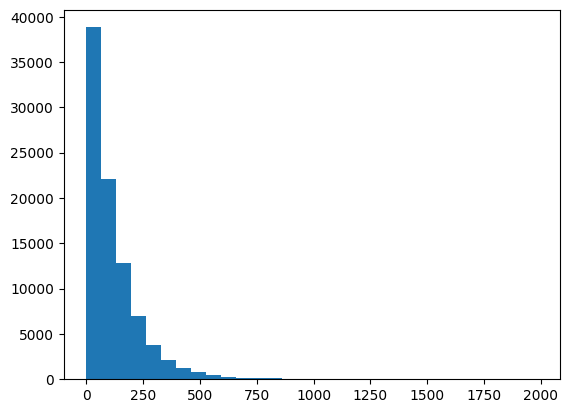

In [ ]:
## Plot histogram
#plt.hist(df['total_calls'], bins=30)
#plt.show()

5. **call_drop_rate**: tasa de llamadas de voz interrumpidas, obtenida dividiendo el número medio de llamadas de voz interrumpidas (drop_vce) por el número medio de llamadas de voz intentadas realizadas (plcd_vce). Esta función puede proporcionar una indicación de la calidad de la llamada o el rendimiento de la red.

In [ ]:
#df['call_drop_rate'] = df['drop_vce'] / df['plcd_vce']

In [ ]:
#infinite_numbers(df, 'call_drop_rate')

Number of infinite values: 4
0.000000    6740
0.058824      67
0.055556      55
0.100000      51
0.100000      51
            ... 
0.033511       1
0.019391       1
0.075314       1
0.036395       1
0.049159       1
Name: call_drop_rate, Length: 33248, dtype: int64


6. **sms_to_call_ratio**: relación entre el número medio de mensajes SMS recibidos (recv_sms) y el número medio de llamadas de voz recibidas (recv_vce). Esta función puede representar la importancia relativa o la preferencia por la comunicación por SMS en comparación con las llamadas de voz.

In [ ]:
#df['sms_to_call_ratio'] = df['recv_sms'] / df['recv_vce']
#infinite_numbers(df, 'sms_to_call_ratio')

Number of infinite values: 9
 0.000000e+00    78174
-1.000000e+09        9
 2.105263e-02        4
 2.061856e-02        3
 8.620690e-03        3
                 ...  
 1.990291e-01        1
 5.357143e-02        1
 1.452785e-02        1
 2.020202e-02        1
 1.141553e-02        1
Name: sms_to_call_ratio, Length: 720, dtype: int64


7. **customer_care_call_rate**: tasa de llamadas de atención al cliente, obtenida dividiendo el número medio de llamadas de atención al cliente (custcare) por el número total de meses en servicio (meses). Esta característica puede indicar el nivel de atención al cliente requerido o el compromiso del cliente con el servicio.

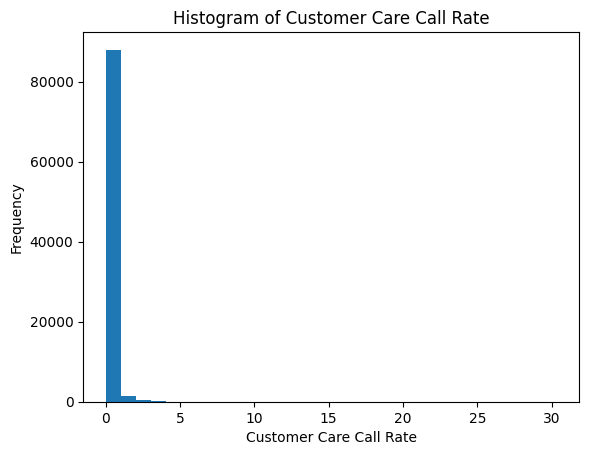

In [ ]:
#df['customer_care_call_rate'] = df['custcare'] / df['months']

## Plot histogram
#plt.hist(df['customer_care_call_rate'], bins=30)
#plt.xlabel('Customer Care Call Rate')
#plt.ylabel('Frequency')
#plt.title('Histogram of Customer Care Call Rate')
#plt.show()

11. **household_size:** variable que indica el tamaño del hogar. Se obtiene combinando las variables 'adults' y las diferentes categorías de grupos de edad de los niños ('kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17'). Esta característica puede reflejar la dinámica familiar y su influencia en la decisión de churn.


In [ ]:
## Suma el número de adultos
#household_size = df['adults']

## Suma el número total de niños para obtener el tamaño total del hogar
#household_size += df['kid0_2'] + df['kid3_5'] + df['kid6_10'] + df['kid11_15'] + df['kid16_17']

#df['household_size'] = household_size

In [ ]:
#df['household_size'].value_counts()

1.0     18751
2.0     15019
3.0     11367
4.0      9766
5.0      6954
6.0      4888
7.0      2135
8.0       872
9.0       184
10.0       29
11.0        2
Name: household_size, dtype: int64

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier. 
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [ ]:
# Calculate null values count
null_values = df.isna().sum()

# Calculate missing proportion
missing_proportion = null_values / df.shape[0]

# Create a DataFrame with null values and missing proportion
result_df = pd.DataFrame({'Null Values': null_values, 'Missing Proportion': missing_proportion})
result_df = result_df[result_df['Null Values'] > 0].sort_values(by='Null Values', ascending=False)

print(result_df)

                  Null Values  Missing Proportion
numbcars                43568            0.484089
dwllsize                33764            0.375156
HHstatin                33032            0.367022
ownrent                 29491            0.327678
dwlltype                27978            0.310867
lor                     26502            0.294467
income                  22196            0.246622
adults                  20033            0.222589
infobase                19403            0.215589
hnd_webcap               9519            0.105767
prizm_social_one         6537            0.072633
kid0_2                   1451            0.016122
kid3_5                   1451            0.016122
marital                  1451            0.016122
creditcd                 1451            0.016122
kid16_17                 1451            0.016122
kid11_15                 1451            0.016122
rv                       1451            0.016122
kid6_10                  1451            0.016122


In [ ]:
df['numbcars'].value_counts(dropna=False) # En 'numbcars' NaN es igual a 0

NaN    43568
1.0    23488
2.0    19473
3.0     3471
Name: numbcars, dtype: int64

In [ ]:
df['numbcars'] = df['numbcars'].fillna(0)

In [ ]:
df['numbcars'].value_counts(dropna=False)

0.0    43568
1.0    23488
2.0    19473
3.0     3471
Name: numbcars, dtype: int64

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df)
print(lista_numericas)
print(lista_boolean)
print(lista_categoricas)
print(target)

['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'refurb_new', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'adults', 'income', 'numbcars', 'forgntvl', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'eqpdays']
['asl_flag']
['new_cell', 'crclscod', 'p

In [ ]:
imputar_nulos = {
    **{col: -999999999 for col in lista_numericas},
    **{col: -999999999 for col in lista_boolean},
    **{col: 'Unknown' for col in lista_categoricas}
}

df = df.fillna(imputar_nulos)

In [ ]:
missing_values_overview(df)


Total missing values: 0

Missing values:
rev           0
mou           0
totmrc        0
da            0
ovrmou        0
             ..
kid11_15      0
kid16_17      0
creditcd      0
eqpdays       0
area_group    0
Length: 99, dtype: int64


# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [ ]:
print('Variables categoricas a encodear:')
df.describe(include=['object']).T

Variables categoricas a encodear:


,count,unique,top,freq
new_cell,90000,3,U,58812
crclscod,90000,54,AA,34152
prizm_social_one,90000,6,S,29203
dualband,90000,5,Y,65977
hnd_webcap,90000,4,WCMB,67396
marital,90000,6,U,33050
infobase,90000,2,M,70597
HHstatin,90000,7,C,36093
dwllsize,90000,16,A,43118
ethnic,90000,17,N,30400


In [ ]:
# Vamos a encodear las variables categóricas con sentido ordinal a través de .map()
dwelling_size_map = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'J': 10,
    'K': 11,
    'L': 12,
    'M': 13,
    'N': 14,
    'O': 15,
    'P': 16,
    'Unknown': -999999999
}

df['dwllsize'] = df['dwllsize'].map(dwelling_size_map)

In [ ]:
print(df['dwllsize'].value_counts())

 1            43118
-999999999    33764
 2             4743
 3             1357
 10            1280
 15            1079
 14             905
 4              678
 11             595
 5              490
 12             449
 6              373
 13             344
 7              319
 8              265
 9              241
Name: dwllsize, dtype: int64


In [ ]:
print('Variables categoricas a encodear:')
ohe_cols = list(df.select_dtypes(include=['object','category']).columns)
ohe_cols

Variables categoricas a encodear:


['new_cell',
 'crclscod',
 'prizm_social_one',
 'dualband',
 'hnd_webcap',
 'marital',
 'infobase',
 'HHstatin',
 'ethnic',
 'area_group']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories = 'auto', drop = 'if_binary', handle_unknown='ignore', max_categories = 6, min_frequency = 1000)

In [ ]:
# Fit and transform the data using the OneHotEncoder
df_ohe = ohe.fit_transform(df[ohe_cols]).toarray()

In [ ]:
import pickle
# Save the transformer object
pickle.dump(ohe, open('/content/drive/MyDrive/NDS_2023/EJERCICIO-ML-Sup/data/ohe_transformer.pkl', 'wb'))

In [ ]:
df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out())
df_ohe.index = df.index
print(df_ohe.columns)

Index(['new_cell_N', 'new_cell_U', 'new_cell_Y', 'crclscod_A', 'crclscod_AA',
       'crclscod_BA', 'crclscod_CA', 'crclscod_EA',
       'crclscod_infrequent_sklearn', 'prizm_social_one_C',
       'prizm_social_one_S', 'prizm_social_one_T', 'prizm_social_one_U',
       'prizm_social_one_Unknown', 'prizm_social_one_infrequent_sklearn',
       'dualband_N', 'dualband_T', 'dualband_Y', 'dualband_infrequent_sklearn',
       'hnd_webcap_Unknown', 'hnd_webcap_WC', 'hnd_webcap_WCMB',
       'hnd_webcap_infrequent_sklearn', 'marital_A', 'marital_B', 'marital_M',
       'marital_S', 'marital_U', 'marital_infrequent_sklearn',
       'infobase_Unknown', 'HHstatin_A', 'HHstatin_B', 'HHstatin_C',
       'HHstatin_I', 'HHstatin_Unknown', 'HHstatin_infrequent_sklearn',
       'ethnic_G', 'ethnic_H', 'ethnic_N', 'ethnic_S', 'ethnic_U',
       'ethnic_infrequent_sklearn', 'area_group_Mid-Atlantic',
       'area_group_Midwest', 'area_group_Northeast', 'area_group_South',
       'area_group_West', 'area_

In [ ]:
df.drop(columns=ohe_cols, inplace=True)

In [ ]:
df = pd.concat([df, df_ohe], axis=1)
print(df.columns)

Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou',
       ...
       'ethnic_N', 'ethnic_S', 'ethnic_U', 'ethnic_infrequent_sklearn',
       'area_group_Mid-Atlantic', 'area_group_Midwest', 'area_group_Northeast',
       'area_group_South', 'area_group_West', 'area_group_infrequent_sklearn'],
      dtype='object', length=137)


In [ ]:
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,refurb_new,hnd_price,phones,models,truck,rv,ownrent,lor,dwlltype,adults,income,numbcars,dwllsize,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_BA,crclscod_CA,crclscod_EA,crclscod_infrequent_sklearn,prizm_social_one_C,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_Unknown,prizm_social_one_infrequent_sklearn,dualband_N,dualband_T,dualband_Y,dualband_infrequent_sklearn,hnd_webcap_Unknown,hnd_webcap_WC,hnd_webcap_WCMB,hnd_webcap_infrequent_sklearn,marital_A,marital_B,marital_M,marital_S,marital_U,marital_infrequent_sklearn,infobase_Unknown,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_I,HHstatin_Unknown,HHstatin_infrequent_sklearn,ethnic_G,ethnic_H,ethnic_N,ethnic_S,ethnic_U,ethnic_infrequent_sklearn,area_group_Mid-Atlantic,area_group_Midwest,area_group_Northeast,area_group_South,area_group_West,area_group_infrequent_sklearn
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,0,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,0.0,1.499900e+02,2.0,2.0,0.0,0.0,1.0,15.0,0.0,1.0,4.0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,361.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,0,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,0.0,-1.000000e+09,7.0,6.0,1.0,1.0,-999999999.0,1.0,0.0,1.0,5.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,240.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,0,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,0.0,2.998999e+01,2.0,1.0,0.0,0.0,1.0,7.0,0.0,2.0,5.0,2.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1504.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [ ]:
features = [i for i in df.columns if i != target]

In [ ]:
y = df[target]
X = df[features]

In [ ]:
def highly_correlated(df, target, threshold):
    col_corr = list()
    colnames = list()
    rownames = list()
    y = df[target]
    X = df[df.columns[df.columns != target]]
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    
    return Z

In [ ]:
highly_corr = highly_correlated(df, 'churn', 0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,mou,rev,1.000000,0.033900,0.033899,rev
1,totmrc,rev,1.000000,0.033899,0.033899,rev
2,totmrc,mou,1.000000,0.033899,0.033900,totmrc
3,da,rev,1.000000,0.033899,0.033899,da
4,da,mou,1.000000,0.033899,0.033900,da
...,...,...,...,...,...,...
101,marital_infrequent_sklearn,kid6_10,1.000000,0.003070,0.003070,kid6_10
102,marital_infrequent_sklearn,kid11_15,1.000000,0.003070,0.003070,kid11_15
103,marital_infrequent_sklearn,kid16_17,1.000000,0.003070,0.003070,marital_infrequent_sklearn
104,marital_infrequent_sklearn,creditcd,1.000000,0.003070,0.003070,creditcd


In [ ]:
# Eliminamos las features altamente correlacionadas
drop_cols = list(highly_corr['F_to_delete'])
X.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['rev', 'rev', 'totmrc', 'da', 'da', 'da', 'ovrmou', 'ovrmou', 'ovrmou', 'ovrmou', 'ovrrev', 'ovrrev', 'ovrrev', 'ovrrev', 'ovrmou', 'vceovr', 'vceovr', 'vceovr', 'vceovr', 'ovrmou', 'ovrrev', 'datovr', 'datovr', 'datovr', 'datovr', 'ovrmou', 'ovrrev', 'vceovr', 'roam', 'roam', 'roam', 'roam', 'ovrmou', 'ovrrev', 'vceovr', 'roam', 'change_rev', 'plcd_vce', 'comp_dat', 'cc_mou', 'inonemin', 'mou_opkd', 'plcd_vce', 'attempt', 'plcd_vce', 'comp_vce', 'attempt', 'totrev', 'totmou', 'totcalls', 'avg6mou', 'avg6mou', 'avg6qty', 'phones', 'models', 'phones', 'truck', 'truck', 'forgntvl', 'truck', 'rv', 'forgntvl', 'truck', 'rv', 'forgntvl', 'kid3_5', 'truck', 'rv', 'forgntvl', 'kid6_10', 'kid6_10', 'truck', 'kid11_15', 'forgntvl', 'kid11_15', 'kid11_15', 'kid11_15', 'truck', 'rv', 'forgntvl', 'kid16_17', 'kid3_5', 'kid6_10', 'kid11_15', 'creditcd', 'creditcd', 'creditcd', 'creditcd', 'creditcd', 'creditcd', 'creditcd', 'creditcd', 'refurb_new', '

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
# Eliminamos columnas practicamente constantes (nula varianza)
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0.01) 
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

2  low variance features were removed:
 ['dualband_infrequent_sklearn', 'area_group_infrequent_sklearn']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 1000001 to 1090000
Columns: 137 entries, rev to area_group_infrequent_sklearn
dtypes: float64(126), int64(11)
memory usage: 94.8 MB


# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()

In [ ]:
# Save to pickle:
df.to_pickle('/content/drive/MyDrive/NDS_2023/EJERCICIO-ML-Sup/data/churn_clean.csv')

In [ ]:
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,refurb_new,hnd_price,phones,models,truck,rv,ownrent,lor,dwlltype,adults,income,numbcars,dwllsize,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_BA,crclscod_CA,crclscod_EA,crclscod_infrequent_sklearn,prizm_social_one_C,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_Unknown,prizm_social_one_infrequent_sklearn,dualband_N,dualband_T,dualband_Y,dualband_infrequent_sklearn,hnd_webcap_Unknown,hnd_webcap_WC,hnd_webcap_WCMB,hnd_webcap_infrequent_sklearn,marital_A,marital_B,marital_M,marital_S,marital_U,marital_infrequent_sklearn,infobase_Unknown,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_I,HHstatin_Unknown,HHstatin_infrequent_sklearn,ethnic_G,ethnic_H,ethnic_N,ethnic_S,ethnic_U,ethnic_infrequent_sklearn,area_group_Mid-Atlantic,area_group_Midwest,area_group_Northeast,area_group_South,area_group_West,area_group_infrequent_sklearn
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,0,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,0.0,1.499900e+02,2.0,2.0,0.0,0.0,1.0,15.0,0.0,1.0,4.0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,361.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,0,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,0.0,-1.000000e+09,7.0,6.0,1.0,1.0,-999999999.0,1.0,0.0,1.0,5.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,240.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,0,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,0.0,2.998999e+01,2.0,1.0,0.0,0.0,1.0,7.0,0.0,2.0,5.0,2.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1504.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.

In [ ]:
df.shape

(90000, 137)